<a href="https://colab.research.google.com/github/Angsumi/Assam_Ethnomedicine/blob/main/Ethnobotany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the Excel file
file_path = '/content/V4.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

Botanical Name  Family Name           Common Name   Partsused  \
0       AGERATUM CONIZOIDES   ASTERACEAE                 Myora        LEAF   
1         BEGONIA ABORENSIS  BEGONIACEAE                  Rebe        STEM   
2       CHROMOLAENA ODORATA   ASTERACEAE        Maling- Jampak        LEAF   
3  CLERODENDRUM GLANDULOSUM    LAMIACEAE  Taapetaa la / Taapin  WHOLEPLANT   
4      DIPLAZIUM ESCULENTUM  ATHYRIACEAE           Pakya- Raya        LEAF   

                                             Disease  \
0                      Blood clotting, Wound healing   
1                                       Stomach pain   
2                             Cuts, Wounds, Bleeding   
3  Breast pain, Back pain, Blood pressure regulation   
4                                 Digestive problems   

                                      Acted Upon  \
0                                  Integumentary   
1                                      Digestive   
2                                  Integumentary   
3  Reproductive, Musculoskeletal, Cardiovascular   
4                                      Digestive   

                                          Way to Use  Tribe State  \
0  Leaves crushed and made into a paste, applied ...  Tagin    AP   
1                                     Stem eaten raw  Tagin    AP   
2         Paste of leaves applied to cuts and wounds  Tagin    AP   
3  Entire plant edible, leaf used during lactatio...  Tagin    AP   
4  Crushed plant parts made into a paste after bo...  Tagin    AP   

                                           Reference  
0  Rinyo, R., Taram, M., Hui, P. K., & Tag, H. (2...  
1  Rinyo, R., Taram, M., Hui, P. K., & Tag, H. (2...  
2  Rinyo, R., Taram, M., Hui, P. K., & Tag, H. (2...  
3  Rinyo, R., Taram, M., Hui, P. K., & Tag, H. (2...  
4  Rinyo, R., Taram, M., Hui, P. K., & Tag, H. (2...

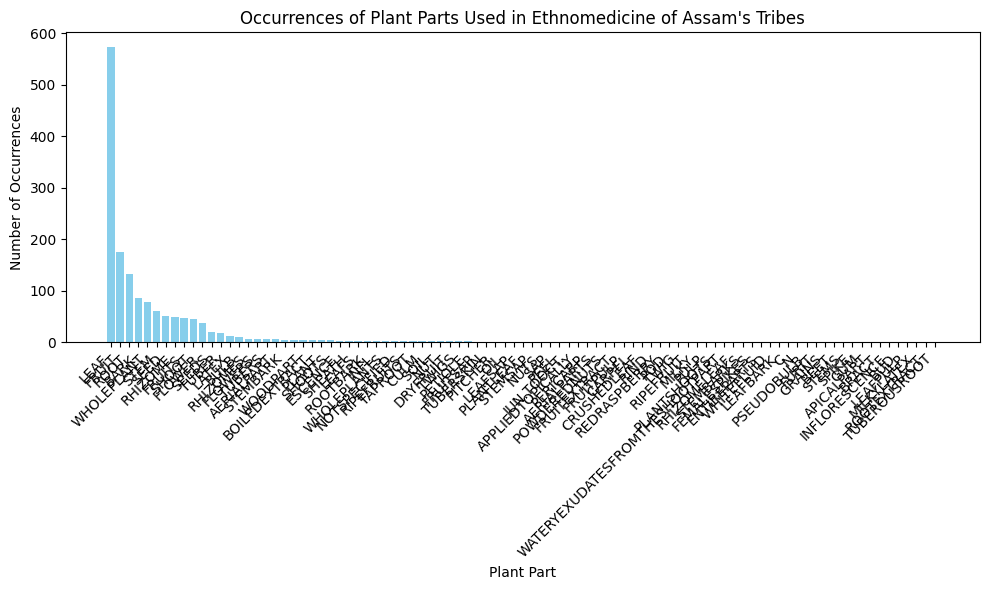

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Splitting the 'Parts used' column and counting occurrences
parts_used = data['Partsused'].str.upper().str.split(', ')
parts_count = Counter(part for parts in parts_used.dropna() for part in parts)

# Converting the counter to a dataframe for plotting
parts_df = pd.DataFrame(parts_count.items(), columns=['Part', 'Occurrences']).sort_values(by='Occurrences', ascending=False)

# Plotting the bar diagram
plt.figure(figsize=(10, 6))
plt.bar(parts_df['Part'], parts_df['Occurrences'], color='skyblue')
plt.xlabel('Plant Part')
plt.ylabel('Number of Occurrences')
plt.title('Occurrences of Plant Parts Used in Ethnomedicine of Assam\'s Tribes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


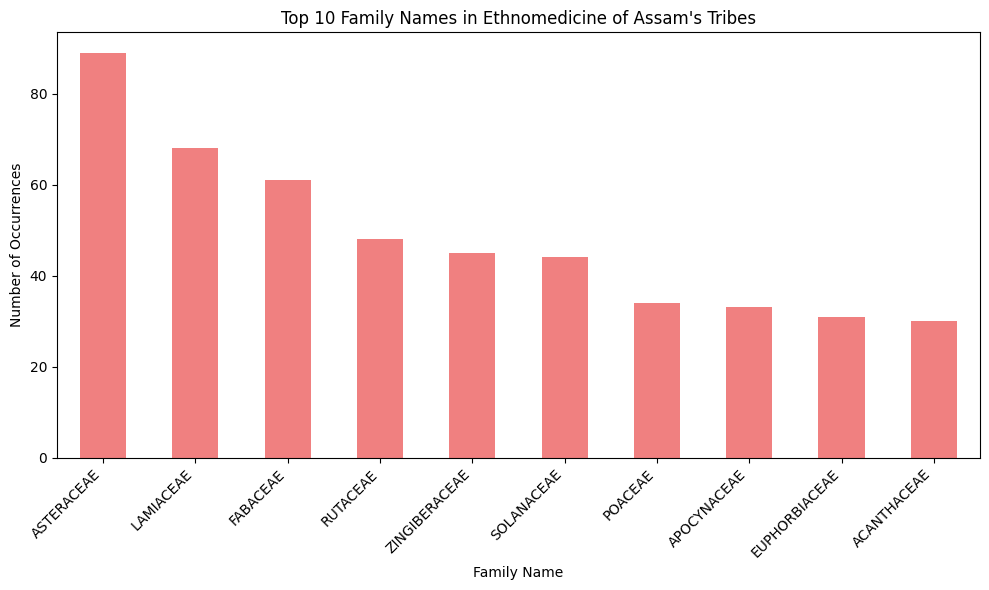

In [ ]:
# Counting occurrences of family names
family_count = data['Family Name'].value_counts().head(10)

# Plotting the bar diagram for top 10 family names
plt.figure(figsize=(10, 6))
family_count.plot(kind='bar', color='lightcoral')
plt.xlabel('Family Name')
plt.ylabel('Number of Occurrences')
plt.title('Top 10 Family Names in Ethnomedicine of Assam\'s Tribes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


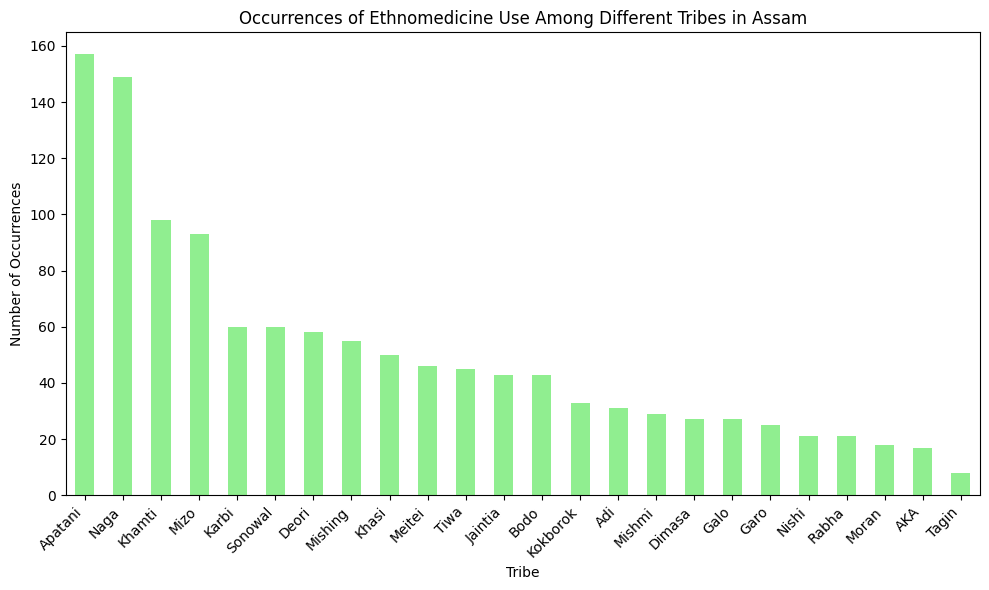

In [ ]:
# Counting occurrences of tribes
tribe_count = data['Tribe'].value_counts()

# Plotting the bar diagram for all tribes
plt.figure(figsize=(10, 6))
tribe_count.plot(kind='bar', color='lightgreen')
plt.xlabel('Tribe')
plt.ylabel('Number of Occurrences')
plt.title('Occurrences of Ethnomedicine Use Among Different Tribes in Assam')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


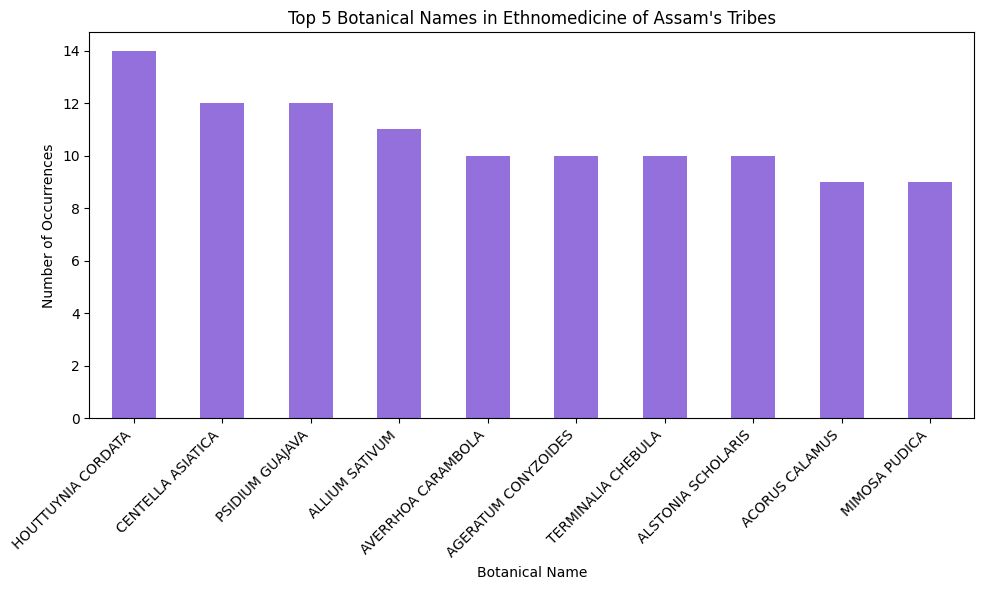

In [ ]:
# Counting occurrences of top 5 botanical names
botanical_name_count = data['Botanical Name'].value_counts().head(10)

# Plotting the bar diagram for top 5 botanical names
plt.figure(figsize=(10, 6))
botanical_name_count.plot(kind='bar', color='mediumpurple')
plt.xlabel('Botanical Name')
plt.ylabel('Number of Occurrences')
plt.title('Top 5 Botanical Names in Ethnomedicine of Assam\'s Tribes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Splitting and counting occurrences of 'Disease' and 'System Acted Upon' jointly
data['Disease_System'] = data['Disease'].str.upper() + " | " + data['System Acted Upon'].str.upper()
disease_system_count = data['Disease_System'].value_counts().head(10)

# Plotting the bar diagram for top 5 diseases and systems acted upon jointly
plt.figure(figsize=(12, 7))
disease_system_count.plot(kind='bar', color='orchid')
plt.xlabel('Disease and System Acted Upon')
plt.ylabel('Number of Occurrences')
plt.title('Top 5 Diseases and Systems Acted Upon Jointly in Ethnomedicine of Assam\'s Tribes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


KeyError: 'Acted Upon'

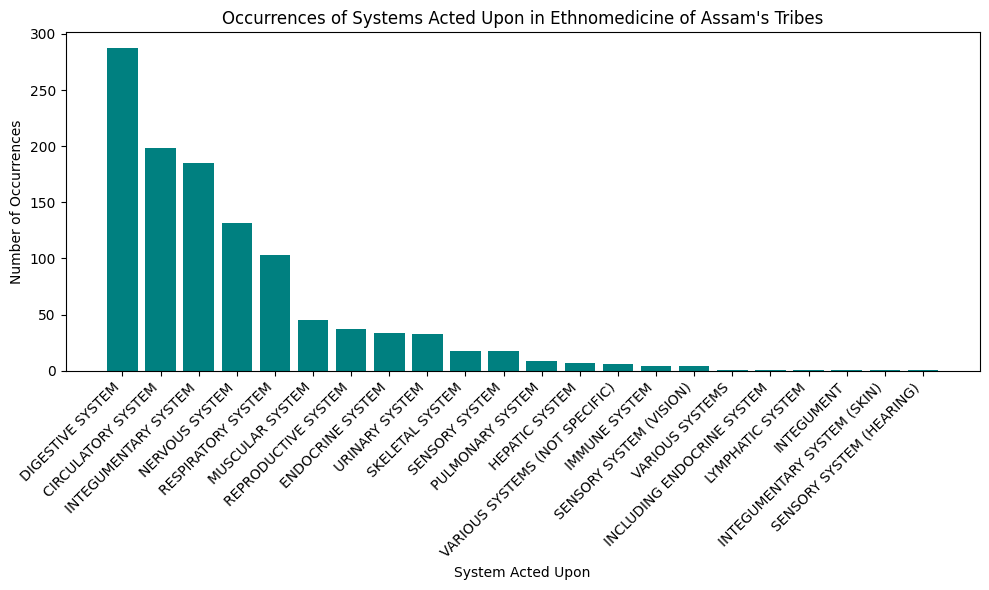

In [ ]:
# Splitting the 'System Acted Upon' column and counting occurrences
systems_used = data['System Acted Upon'].str.upper().str.split(', ')
systems_count = Counter(system for systems in systems_used.dropna() for system in systems)

# Converting the counter to a dataframe for plotting
systems_df = pd.DataFrame(systems_count.items(), columns=['System', 'Occurrences']).sort_values(by='Occurrences', ascending=False)

# Plotting the bar diagram
plt.figure(figsize=(10, 6))
plt.bar(systems_df['System'], systems_df['Occurrences'], color='teal')
plt.xlabel('System Acted Upon')
plt.ylabel('Number of Occurrences')
plt.title('Occurrences of Systems Acted Upon in Ethnomedicine of Assam\'s Tribes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
from collections import Counter
import numpy as np

# Function to process the 'System Acted Upon' column
def process_systems(systems):
    if pd.isna(systems):
        return []
    return [system.strip() for system in systems.split(',')]

# Splitting the 'System Acted Upon' into individual systems and counting occurrences
df['Processed Systems'] = df['System Acted Upon'].apply(process_systems)
family_system_pairs = Counter()

for _, row in df.iterrows():
    family = row['Family Name']
    for system in row['Processed Systems']:
        family_system_pairs[(family, system)] += 1

# Creating a matrix for the heatmap
families = sorted(set(df['Family Name']))
systems = sorted(set(sum(df['Processed Systems'].tolist(), [])))

heatmap_matrix = np.zeros((len(families), len(systems)))

for (family, system), count in family_system_pairs.items():
    family_index = families.index(family)
    system_index = systems.index(system)
    heatmap_matrix[family_index, system_index] = count

# Families and Systems for axes labels
(families, systems), heatmap_matrix.shape


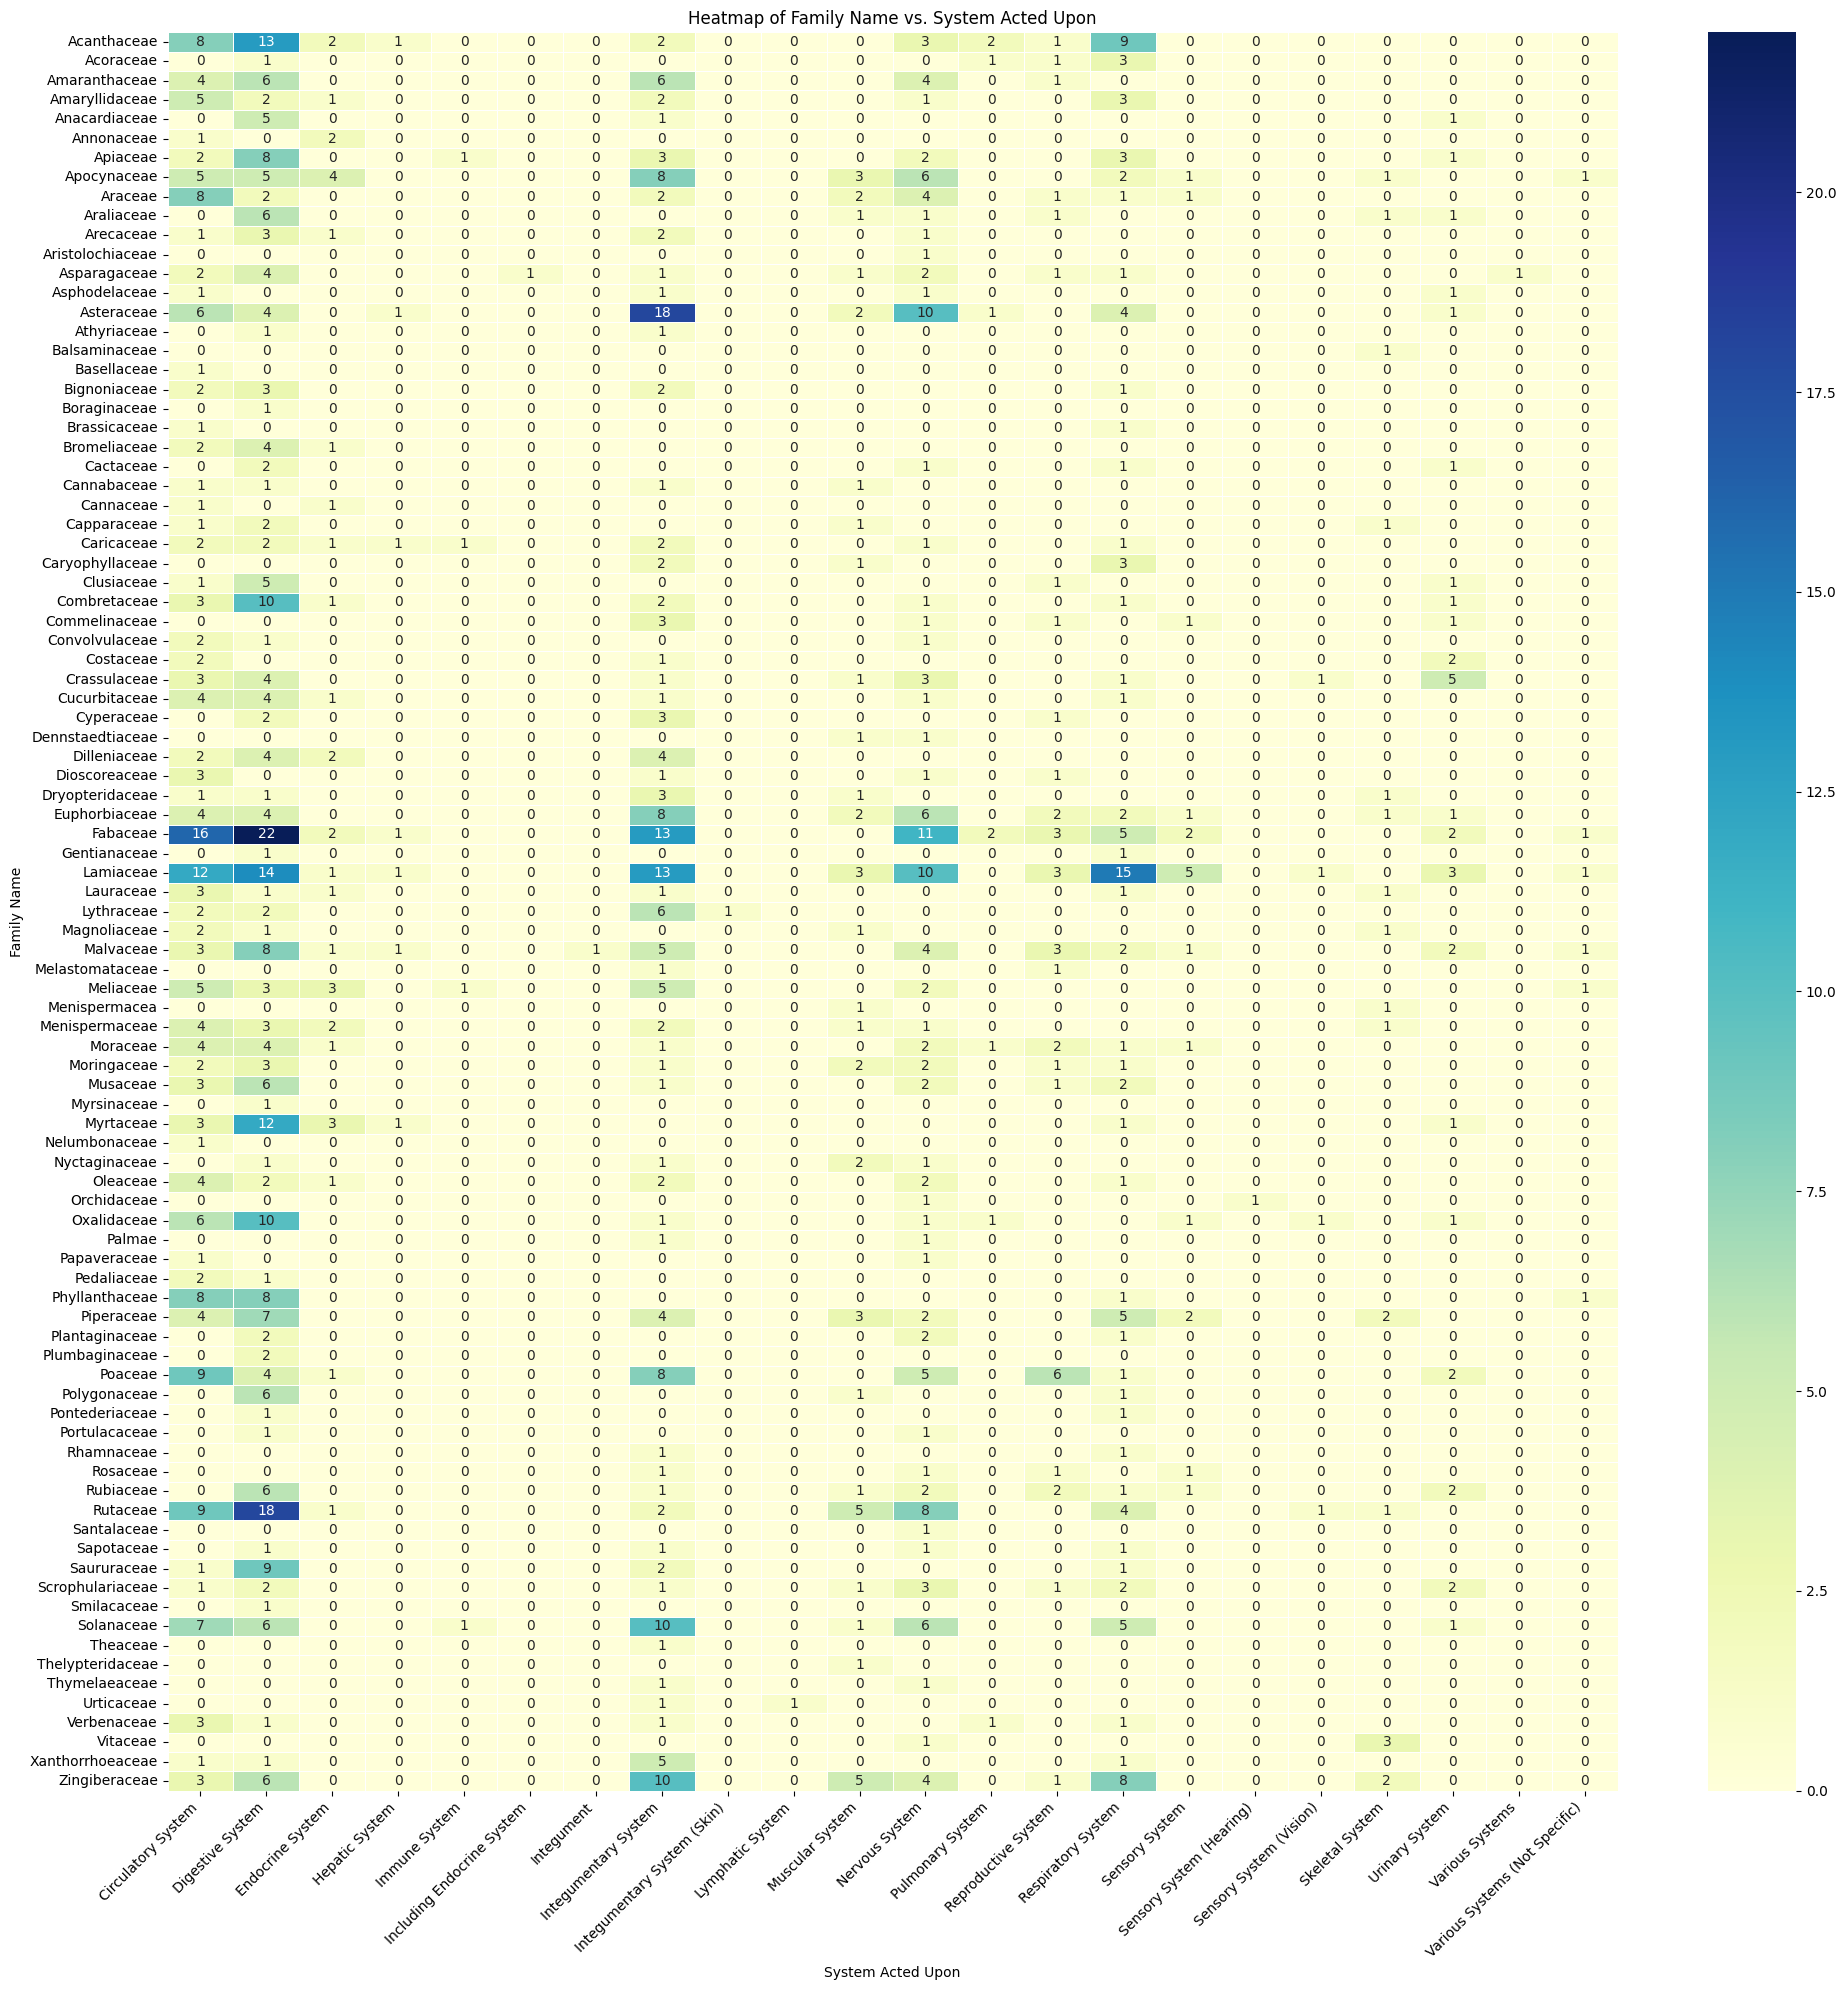

'/content/family_system_heatmap.png'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(heatmap_matrix, annot=True, fmt=".0f", linewidths=.5, cmap="YlGnBu",
            xticklabels=systems, yticklabels=families)
plt.title('Heatmap of Family Name vs. System Acted Upon')
plt.xlabel('System Acted Upon')
plt.ylabel('Family Name')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

# Save the heatmap
heatmap_path = '/content/family_system_heatmap.png'
plt.savefig(heatmap_path)
plt.show()

heatmap_path


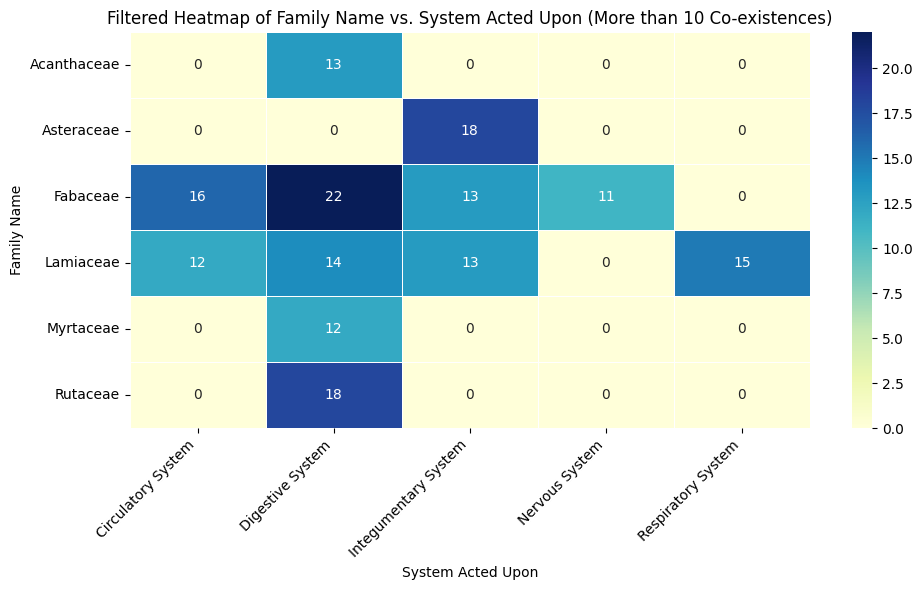

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the data
file_path = 'path_to_your_file.xlsx'  # Replace with your file path
df = pd.read_excel('/content/V5 Juice=Fruit.xlsx')

# Function to process the 'System Acted Upon' column
def process_systems(systems):
    if pd.isna(systems):
        return []
    return [system.strip() for system in systems.split(',')]

# Splitting and counting occurrences
df['Processed Systems'] = df['System Acted Upon'].apply(process_systems)
family_system_pairs = Counter()

for _, row in df.iterrows():
    family = row['Family Name']
    for system in row['Processed Systems']:
        family_system_pairs[(family, system)] += 1

# Filtering pairs with more than 10 co-existences
filtered_family_system_pairs = {pair: count for pair, count in family_system_pairs.items() if count > 10}

# Creating the matrix for the filtered heatmap
filtered_families = sorted(set(pair[0] for pair in filtered_family_system_pairs))
filtered_systems = sorted(set(pair[1] for pair in filtered_family_system_pairs))
filtered_heatmap_matrix = np.zeros((len(filtered_families), len(filtered_systems)))

for (family, system), count in filtered_family_system_pairs.items():
    family_index = filtered_families.index(family)
    system_index = filtered_systems.index(system)
    filtered_heatmap_matrix[family_index, system_index] = count

# Creating the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_heatmap_matrix, annot=True, fmt=".0f", linewidths=.5, cmap="YlGnBu",
            xticklabels=filtered_systems, yticklabels=filtered_families)
plt.title('Filtered Heatmap of Family Name vs. System Acted Upon (More than 10 Co-existences)')
plt.xlabel('System Acted Upon')
plt.ylabel('Family Name')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
data = df
# Filtering the dataset for plants belonging to the Asteraceae family and focusing on the integumentary system
asteraceae_data = data[data['Family Name'] == 'Asteraceae']
asteraceae_integumentary = asteraceae_data[asteraceae_data['System Acted Upon'].str.contains('Integumentary', case=False, na=False)]

# Similarly, filtering for plants from the Acanthaceae family and focusing on the digestive system
acanthaceae_data = data[data['Family Name'] == 'Acanthaceae']
acanthaceae_digestive = acanthaceae_data[acanthaceae_data['System Acted Upon'].str.contains('Digestive', case=False, na=False)]

# Displaying the first few rows of each filtered dataset for review
asteraceae_integumentary.head(), acanthaceae_digestive.head()


In [ ]:
asteraceae_integumentary.head()

Botanical Name Family Name     Common Name   Parts used  \
67   Ageratum Conyzoides  Asteraceae     Gundgua Ban  LEAF, SHOOT   
74       Bonnaya Brachia  Asteraceae  Horu Kasidoria         LEAF   
138         Eclipta Alba  Asteraceae         Kehrosi         LEAF   
150    Mikania Micrantha  Asteraceae     Kalkut Iota         LEAF   
177    Mikania Micrantha  Asteraceae         Kulibon         LEAF   

                     Disease                         System Acted Upon  \
67           Cuts And Wounds      Nervous System, Integumentary System   
74                    Wounds      Nervous System, Integumentary System   
138    Jaundice, Cut & Wound  Circulatory System, Integumentary System   
150  Various Skin Infections                      Integumentary System   
177            Wound Healing      Nervous System, Integumentary System   

                                            Way to use    Tribe  \
67                       Made Into A Paste And Applied  Sonowal   
74                          Paste Of Fresh Leaves Used  Sonowal   
138                  Leaf Juice And Extract Are Useful    Rabha   
150            Leaf Paste Mixed With Ocimum Sanctum L.    Rabha   
177  Leaves Crushed And Used Directly On Cuts And W...    Rabha   

                              Processed Systems  
67       [Nervous System, Integumentary System]  
74       [Nervous System, Integumentary System]  
138  [Circulatory System, Integumentary System]  
150                      [Integumentary System]  
177      [Nervous System, Integumentary System]

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Botanical Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Common Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Parts used').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Disease').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Common Name'].value_counts()
    for x_label, grp in _df_4.groupby('Botanical Name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Botanical Name')
_ = plt.ylabel('Common Name')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Parts used'].value_counts()
    for x_label, grp in _df_5.groupby('Common Name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Common Name')
_ = plt.ylabel('Parts used')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Disease'].value_counts()
    for x_label, grp in _df_6.groupby('Parts used')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Parts used')
_ = plt.ylabel('Disease')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['System Acted Upon'].value_counts()
    for x_label, grp in _df_7.groupby('Disease')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Disease')
_ = plt.ylabel('System Acted Upon')

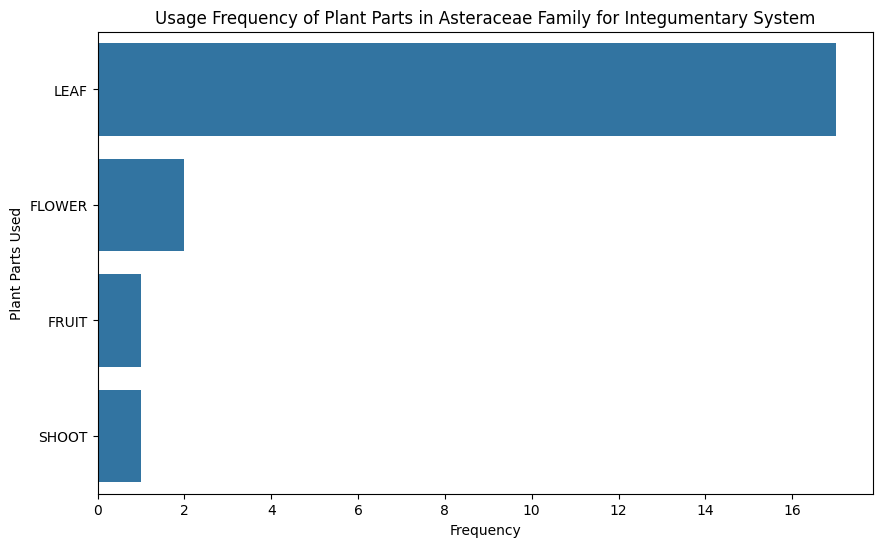

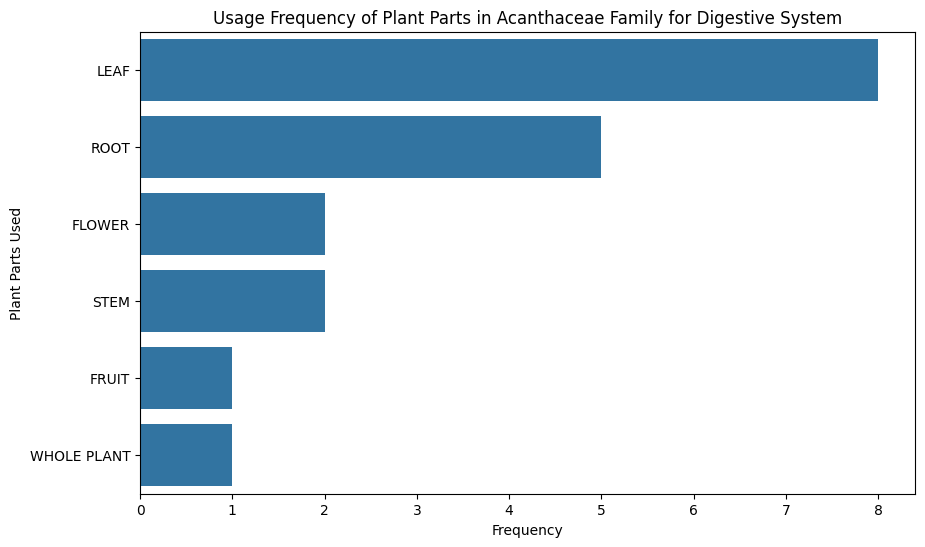

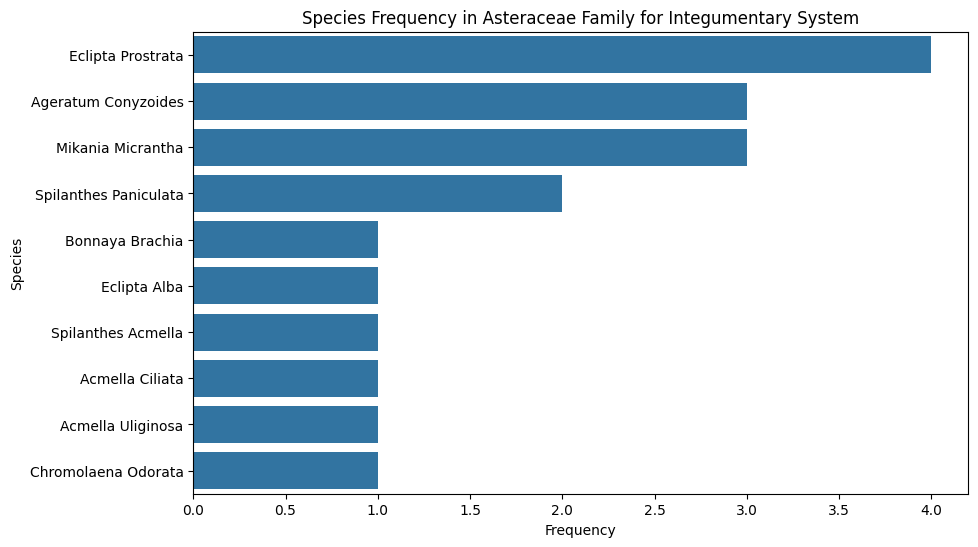

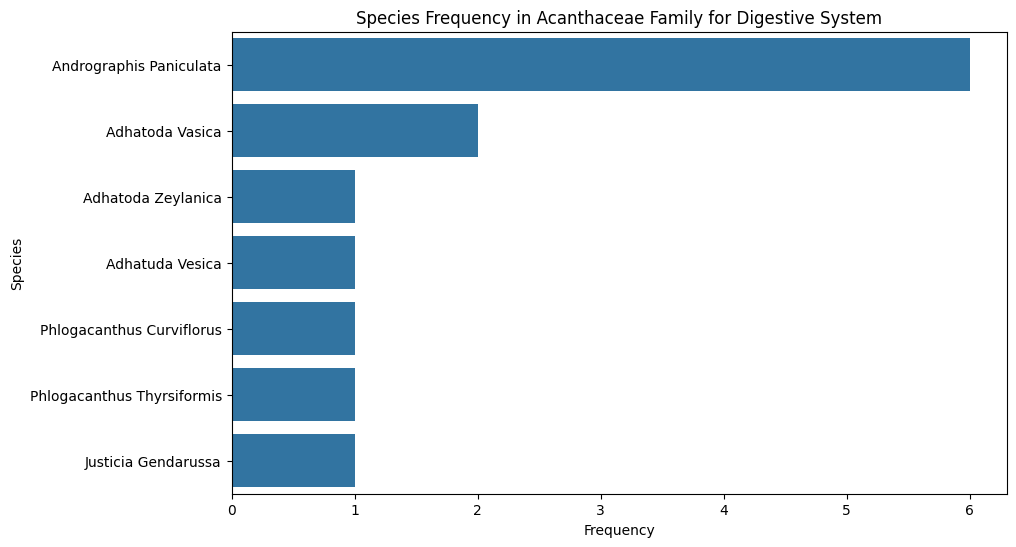

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot the frequency and patterns of usage of different plant parts
def plot_plant_parts_usage(data, title):
    # Counting the occurrences of each plant part
    parts_count = data['Parts used'].str.get_dummies(sep=', ').sum()
    parts_count.sort_values(ascending=False, inplace=True)

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=parts_count.values, y=parts_count.index)
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Plant Parts Used')
    plt.show()

# Plotting for Asteraceae Family and Integumentary System
plot_plant_parts_usage(asteraceae_integumentary, 'Usage Frequency of Plant Parts in Asteraceae Family for Integumentary System')

# Plotting for Acanthaceae Family and Digestive System
plot_plant_parts_usage(acanthaceae_digestive, 'Usage Frequency of Plant Parts in Acanthaceae Family for Digestive System')

# Function to plot the frequency of species
def plot_species_frequency(data, title):
    species_count = data['Botanical Name'].value_counts()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=species_count.values, y=species_count.index)
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Species')
    plt.show()

# Plotting species frequency for both datasets
plot_species_frequency(asteraceae_integumentary, 'Species Frequency in Asteraceae Family for Integumentary System')
plot_species_frequency(acanthaceae_digestive, 'Species Frequency in Acanthaceae Family for Digestive System')


In [ ]:
# Filtering the dataset for plants belonging to the Fabaceae family and focusing on the specified systems
fabaceae_data = data[data['Family Name'] == 'Fabaceae']
fabaceae_systems = fabaceae_data[fabaceae_data['System Acted Upon'].str.contains('Circulatory|Digestive|Integumentary|Nervous', case=False, na=False)]

# Displaying the first few rows of the filtered dataset for review
fabaceae_systems.head()


Botanical Name Family Name Common Name  Parts used  \
25      Erythrina Indica    Fabaceae       Moder        LEAF   
31         Mimosa Pudica    Fabaceae   Nilajibon        ROOT   
41  Sesbania Grandiflora    Fabaceae    Bokphool      FLOWER   
61           Cassia Tora    Fabaceae   Bilokhoni        LEAF   
64        Cassia Fistula    Fabaceae      Sonaru  LEAF, ROOT   

                             Disease                      System Acted Upon  \
25                      Worms, Cough     Pulmonary System, Digestive System   
31  Gum Problems, Menstrual Problems  Digestive System, Reproductive System   
41  Blood Sugar, High Blood Pressure                     Circulatory System   
61           Eczema, Skin Infections                   Integumentary System   
64                       Indigestion                       Digestive System   

                                           Way to use          Tribe  \
25                           Tender Leaf Extract Used  Tiwa / Lalung   
31                               Root Extract Applied  Tiwa / Lalung   
41       Used For Blood Sugar And High Blood Pressure  Tiwa / Lalung   
61  7/9 Fresh Leaves Are Ground To A Paste And App...        Sonowal   
64  Decoction Prepared With Salt And Black Pepper ...        Sonowal   

                          Processed Systems  
25     [Pulmonary System, Digestive System]  
31  [Digestive System, Reproductive System]  
41                     [Circulatory System]  
61                   [Integumentary System]  
64                       [Digestive System]

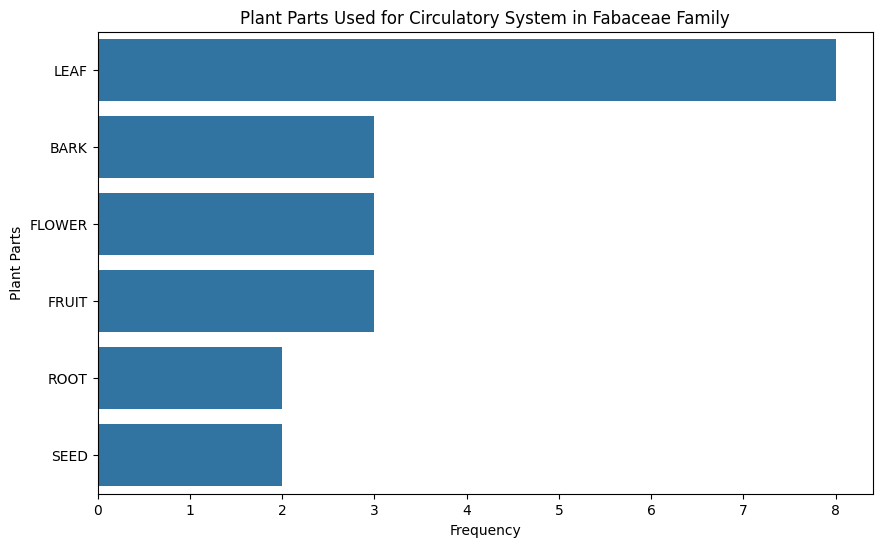

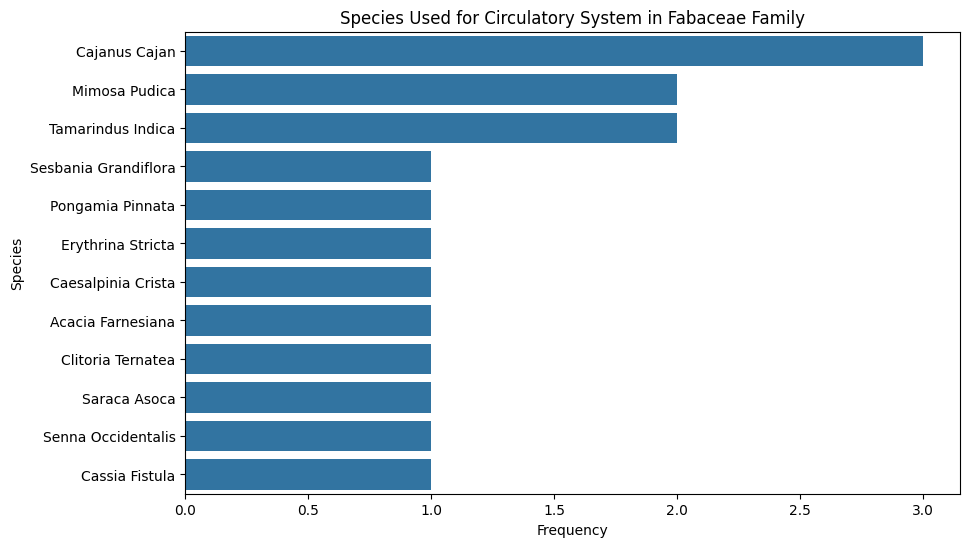

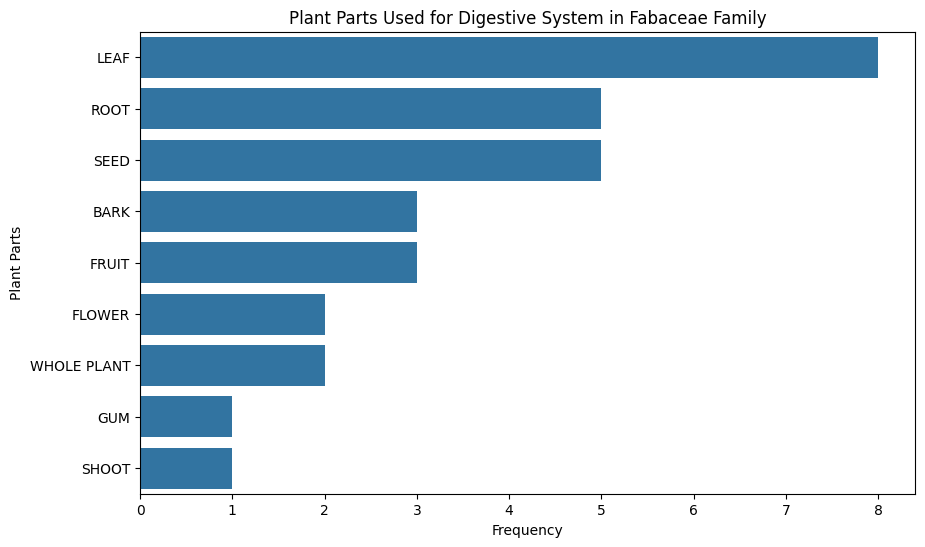

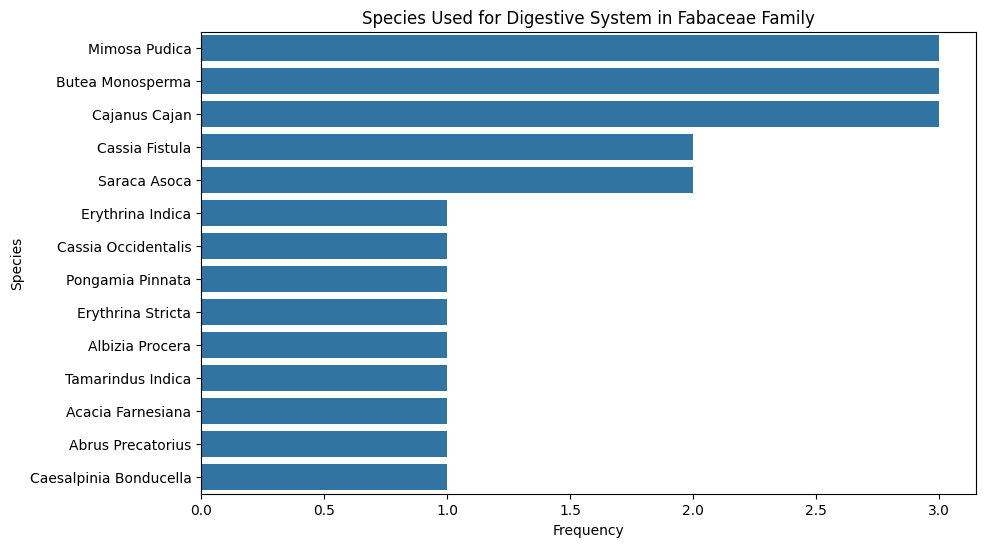

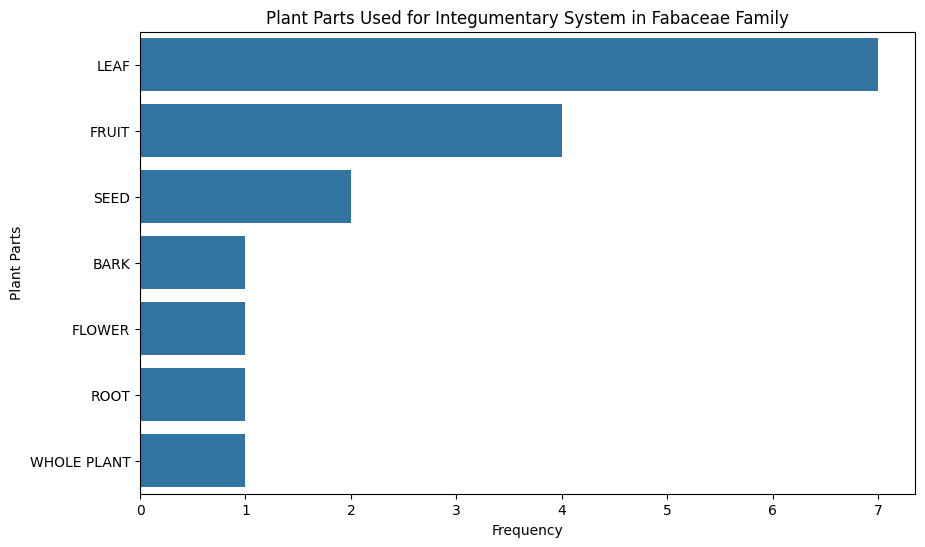

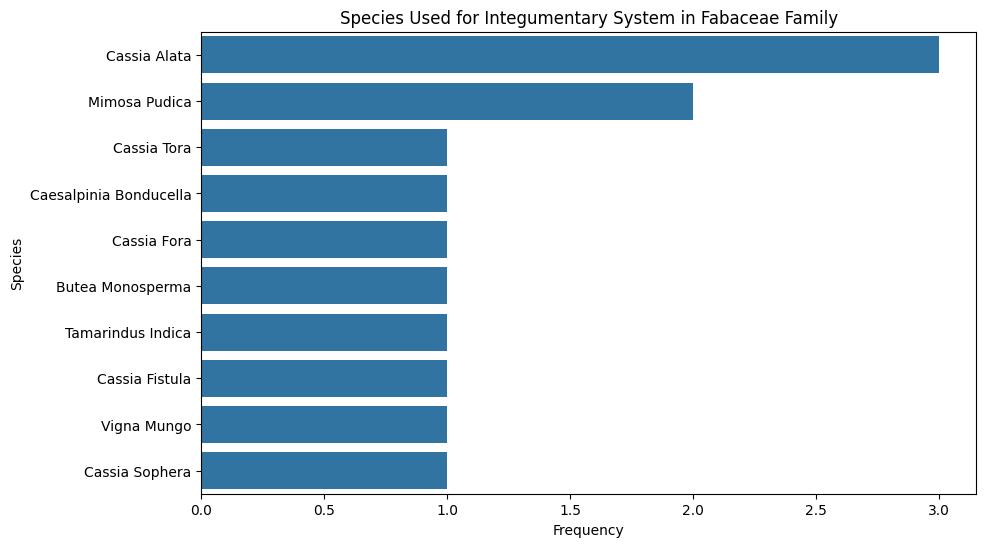

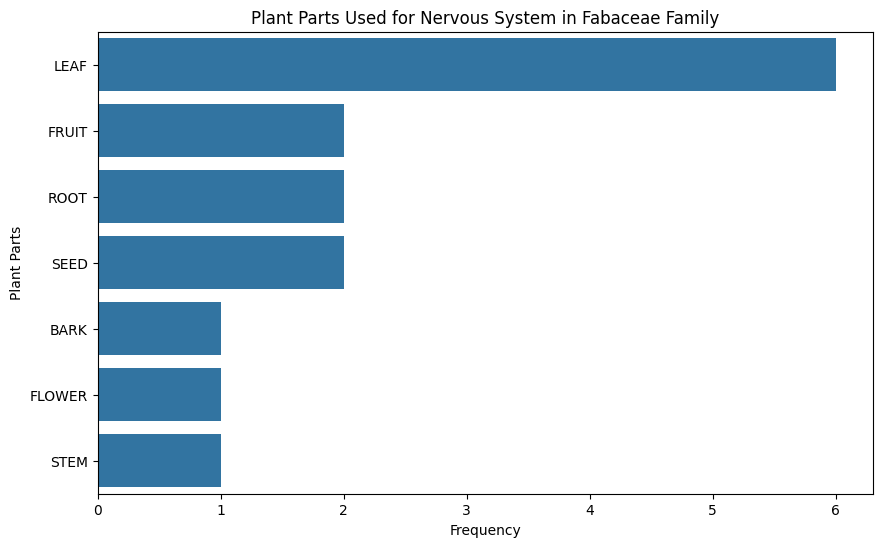

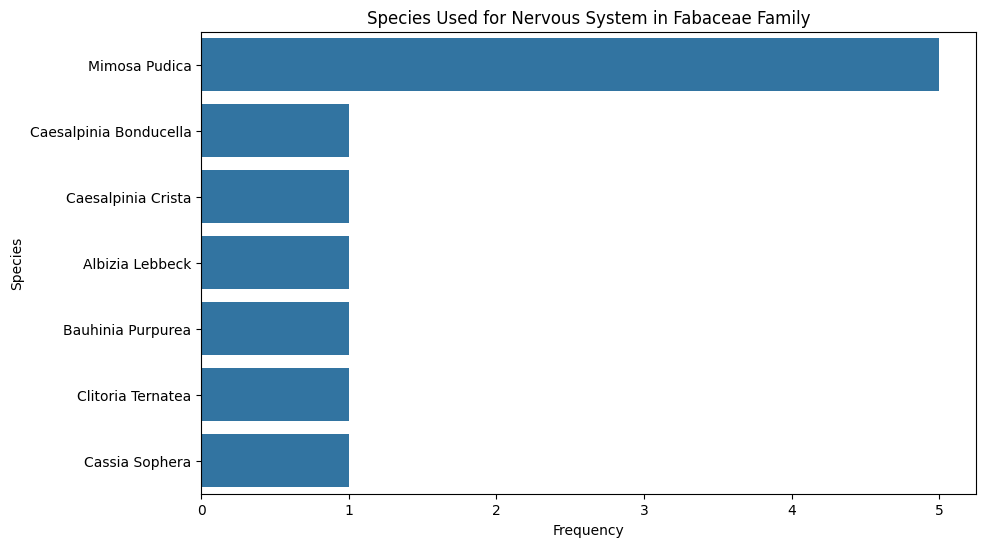

In [ ]:
# Creating separate datasets for each system within the Fabaceae family
circulatory_system_fabaceae = fabaceae_systems[fabaceae_systems['System Acted Upon'].str.contains('Circulatory', case=False, na=False)]
digestive_system_fabaceae = fabaceae_systems[fabaceae_systems['System Acted Upon'].str.contains('Digestive', case=False, na=False)]
integumentary_system_fabaceae = fabaceae_systems[fabaceae_systems['System Acted Upon'].str.contains('Integumentary', case=False, na=False)]
nervous_system_fabaceae = fabaceae_systems[fabaceae_systems['System Acted Upon'].str.contains('Nervous', case=False, na=False)]

# Function to plot the frequency of plant parts used for each system
def plot_parts_used_for_system(data, system_name):
    parts_count = data['Parts used'].str.get_dummies(sep=', ').sum()
    parts_count.sort_values(ascending=False, inplace=True)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=parts_count.values, y=parts_count.index)
    plt.title(f'Plant Parts Used for {system_name} in Fabaceae Family')
    plt.xlabel('Frequency')
    plt.ylabel('Plant Parts')
    plt.show()

# Function to plot the frequency of species used for each system
def plot_species_for_system(data, system_name):
    species_count = data['Botanical Name'].value_counts()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=species_count.values, y=species_count.index)
    plt.title(f'Species Used for {system_name} in Fabaceae Family')
    plt.xlabel('Frequency')
    plt.ylabel('Species')
    plt.show()

# Plotting for each system
plot_parts_used_for_system(circulatory_system_fabaceae, 'Circulatory System')
plot_species_for_system(circulatory_system_fabaceae, 'Circulatory System')

plot_parts_used_for_system(digestive_system_fabaceae, 'Digestive System')
plot_species_for_system(digestive_system_fabaceae, 'Digestive System')

plot_parts_used_for_system(integumentary_system_fabaceae, 'Integumentary System')
plot_species_for_system(integumentary_system_fabaceae, 'Integumentary System')

plot_parts_used_for_system(nervous_system_fabaceae, 'Nervous System')
plot_species_for_system(nervous_system_fabaceae, 'Nervous System')


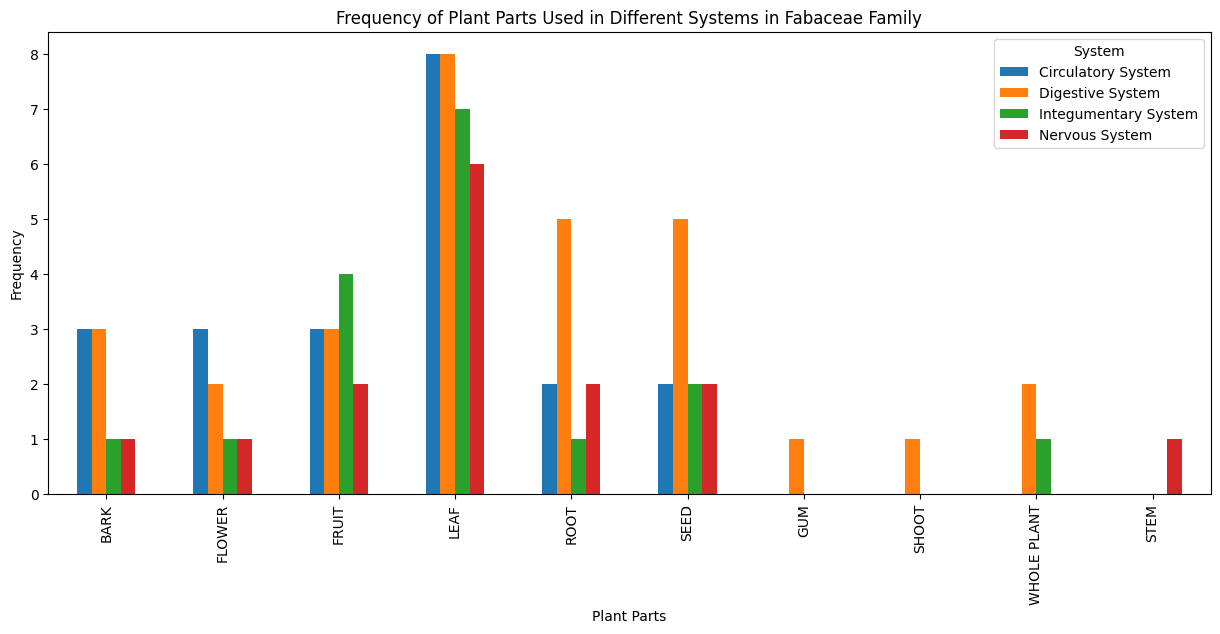

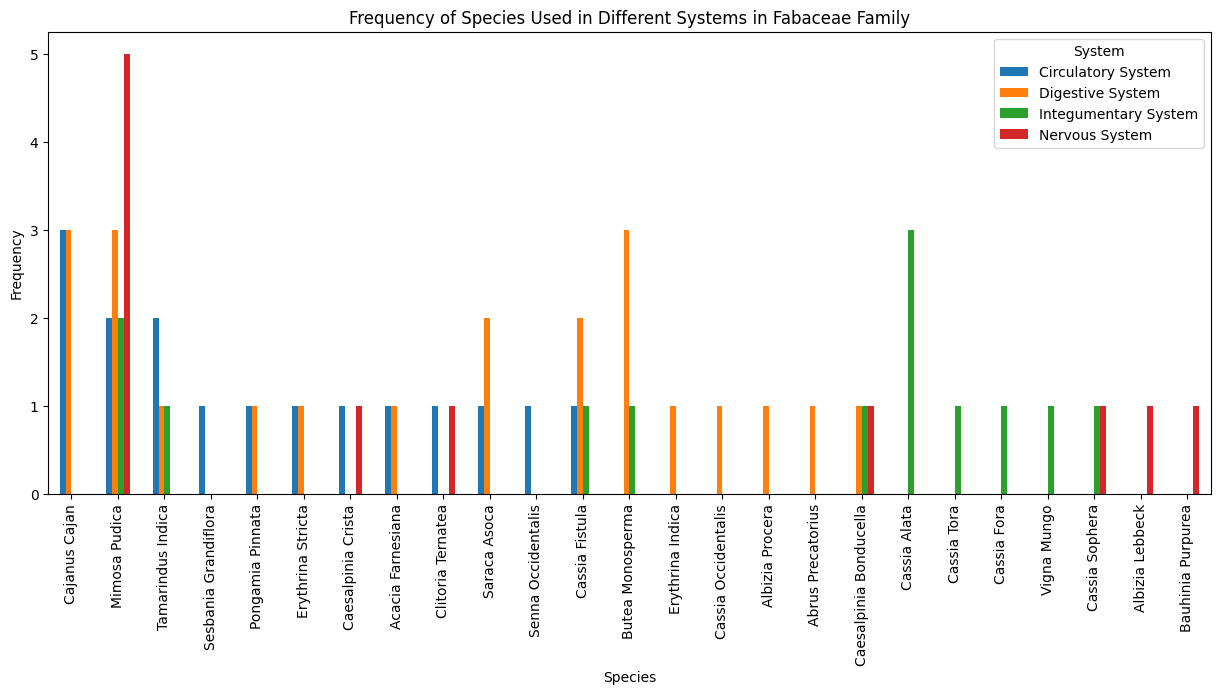

In [ ]:
# Creating unified plots for the frequency of plant parts used and species for each system

# Function to create a unified plot for plant parts used in different systems
def unified_plot_parts_used(systems_data, systems_names):
    # Creating a DataFrame for plotting
    parts_data = pd.DataFrame()
    for system, data in zip(systems_names, systems_data):
        parts_count = data['Parts used'].str.get_dummies(sep=', ').sum().rename(system)
        parts_data = pd.concat([parts_data, parts_count], axis=1, sort=False)

    # Plotting
    parts_data.fillna(0, inplace=True)
    parts_data.plot(kind='bar', figsize=(15, 6))
    plt.title('Frequency of Plant Parts Used in Different Systems in Fabaceae Family')
    plt.xlabel('Plant Parts')
    plt.ylabel('Frequency')
    plt.legend(title='System')
    plt.show()

# Function to create a unified plot for species used in different systems
def unified_plot_species(systems_data, systems_names):
    # Creating a DataFrame for plotting
    species_data = pd.DataFrame()
    for system, data in zip(systems_names, systems_data):
        species_count = data['Botanical Name'].value_counts().rename(system)
        species_data = pd.concat([species_data, species_count], axis=1, sort=False)

    # Plotting
    species_data.fillna(0, inplace=True)
    species_data.plot(kind='bar', figsize=(15, 6))
    plt.title('Frequency of Species Used in Different Systems in Fabaceae Family')
    plt.xlabel('Species')
    plt.ylabel('Frequency')
    plt.legend(title='System')
    plt.show()

# Preparing the data
systems_data = [circulatory_system_fabaceae, digestive_system_fabaceae, integumentary_system_fabaceae, nervous_system_fabaceae]
systems_names = ['Circulatory System', 'Digestive System', 'Integumentary System', 'Nervous System']

# Creating unified plots
unified_plot_parts_used(systems_data, systems_names)
unified_plot_species(systems_data, systems_names)


In [ ]:
# Filtering the dataset for plants belonging to the Fabaceae family and focusing on the specified systems
lamiaceae_data = data[data['Family Name'] == 'Lamiaceae']
lemiaceae_systems = lamiaceae_data[lamiaceae_data['System Acted Upon'].str.contains('Circulatory|Digestive|Integumentary|Respiratory', case=False, na=False)]

# Displaying the first few rows of the filtered dataset for review
lemiaceae_systems.head()

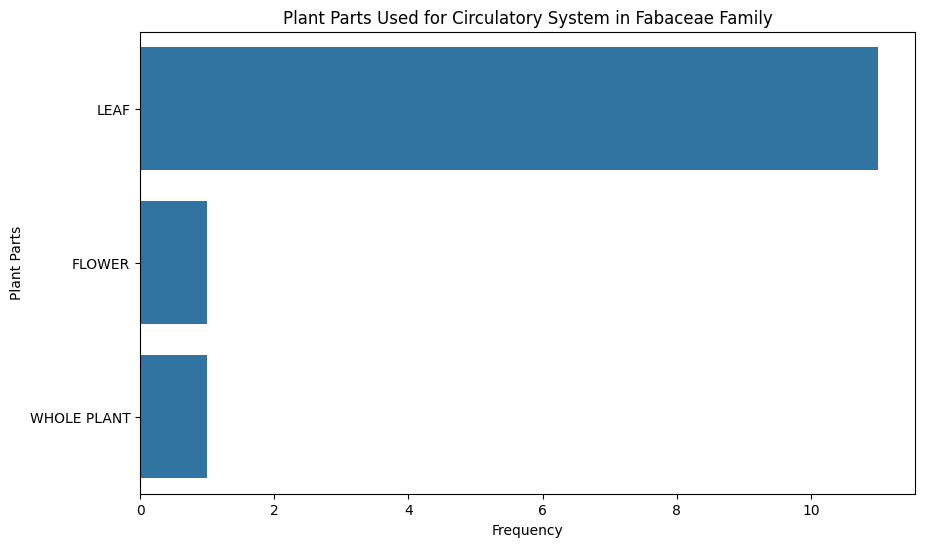

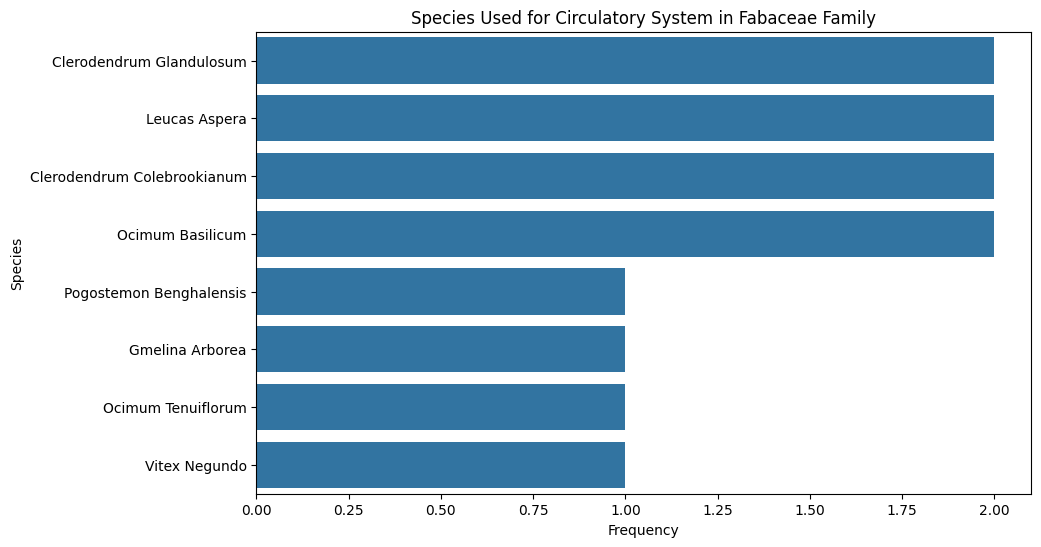

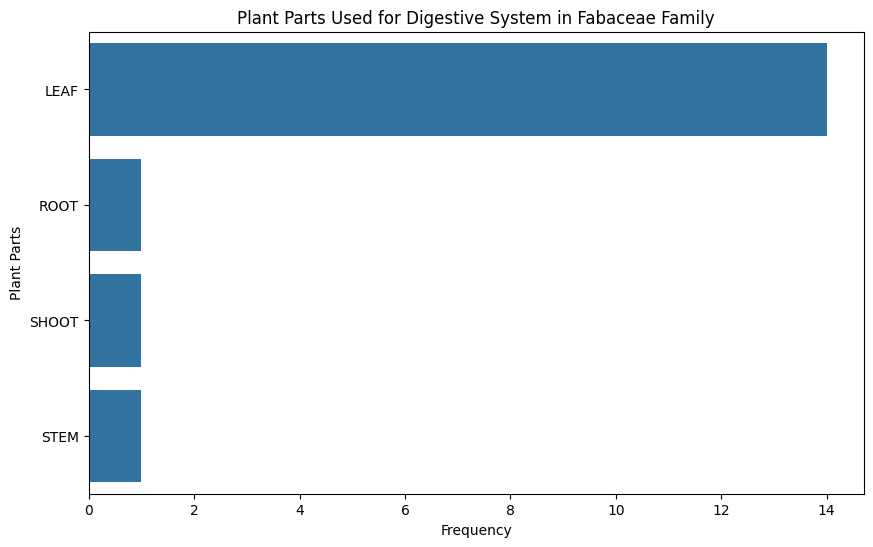

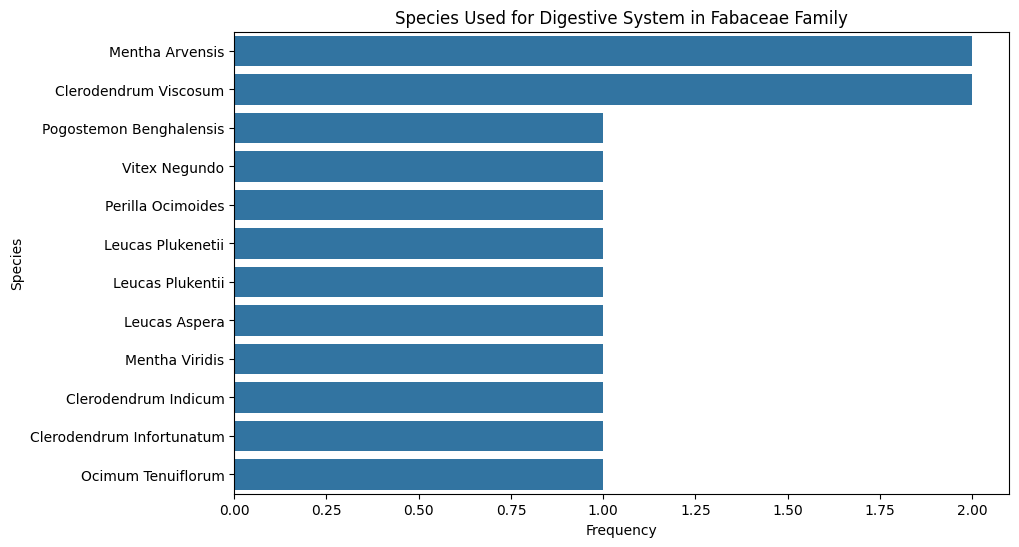

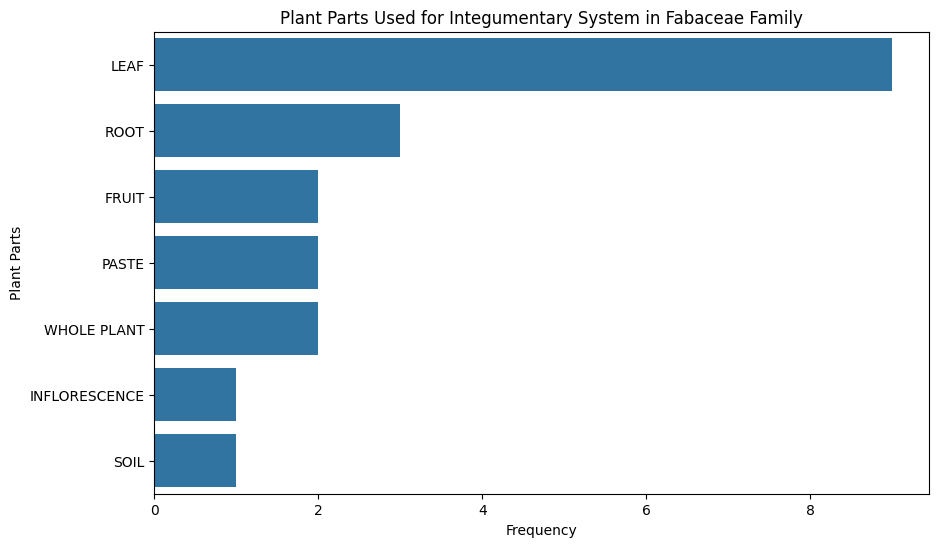

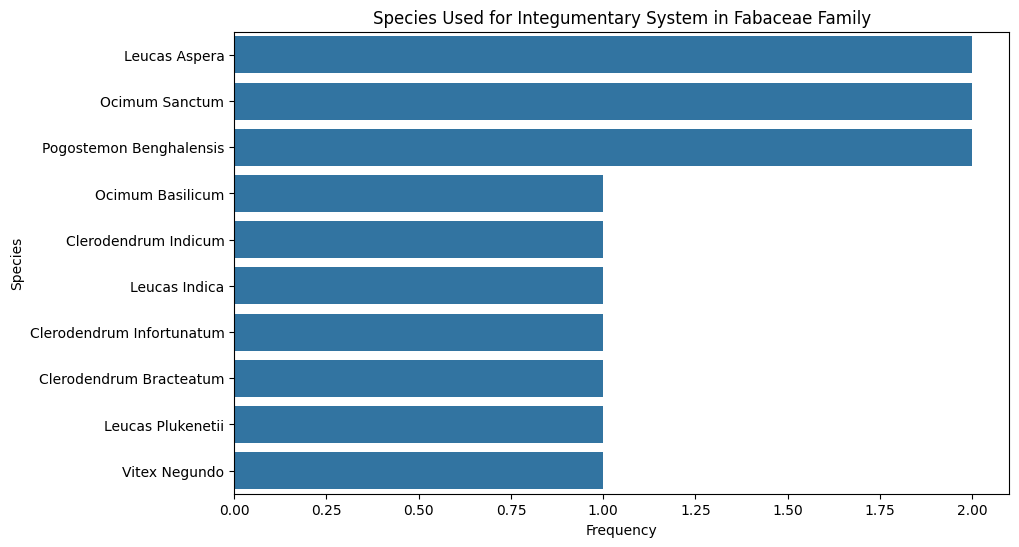

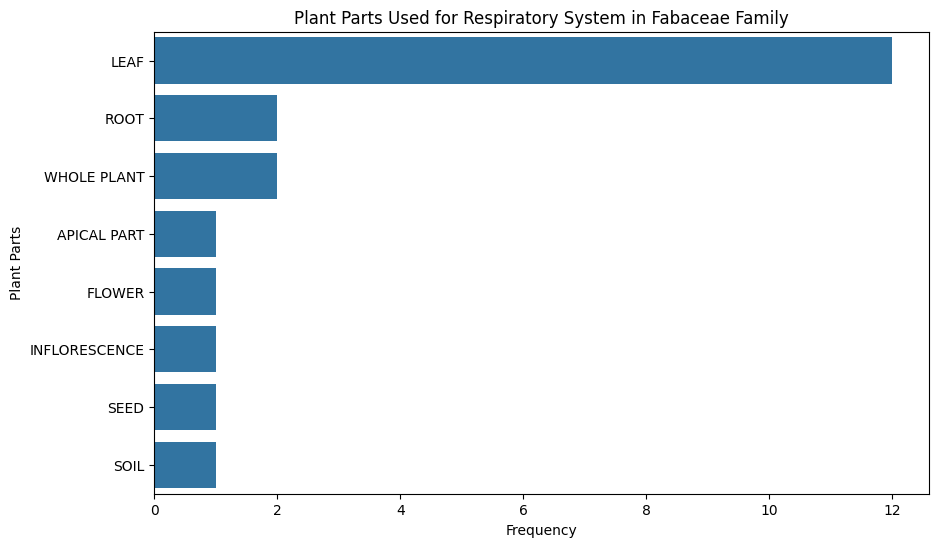

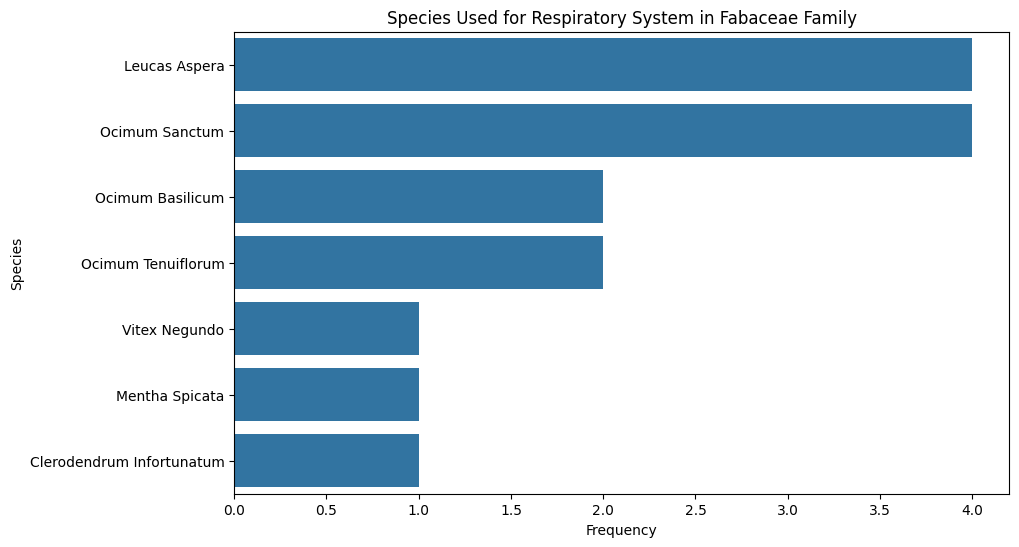

In [ ]:
# Creating separate datasets for each system within the Lemiaceae family
circulatory_system_lemiaceae = lemiaceae_systems[lemiaceae_systems['System Acted Upon'].str.contains('Circulatory', case=False, na=False)]
digestive_system_lemiaceae = lemiaceae_systems[lemiaceae_systems['System Acted Upon'].str.contains('Digestive', case=False, na=False)]
integumentary_system_lemiaceae = lemiaceae_systems[lemiaceae_systems['System Acted Upon'].str.contains('Integumentary', case=False, na=False)]
Respiratory_system_lemiaceae = lemiaceae_systems[lemiaceae_systems['System Acted Upon'].str.contains('Respiratory', case=False, na=False)]

# Plotting for each system
plot_parts_used_for_system(circulatory_system_lemiaceae, 'Circulatory System')
plot_species_for_system(circulatory_system_lemiaceae, 'Circulatory System')

plot_parts_used_for_system(digestive_system_lemiaceae, 'Digestive System')
plot_species_for_system(digestive_system_lemiaceae, 'Digestive System')

plot_parts_used_for_system(integumentary_system_lemiaceae, 'Integumentary System')
plot_species_for_system(integumentary_system_lemiaceae, 'Integumentary System')

plot_parts_used_for_system(Respiratory_system_lemiaceae, 'Respiratory System')
plot_species_for_system(Respiratory_system_lemiaceae, 'Respiratory System')



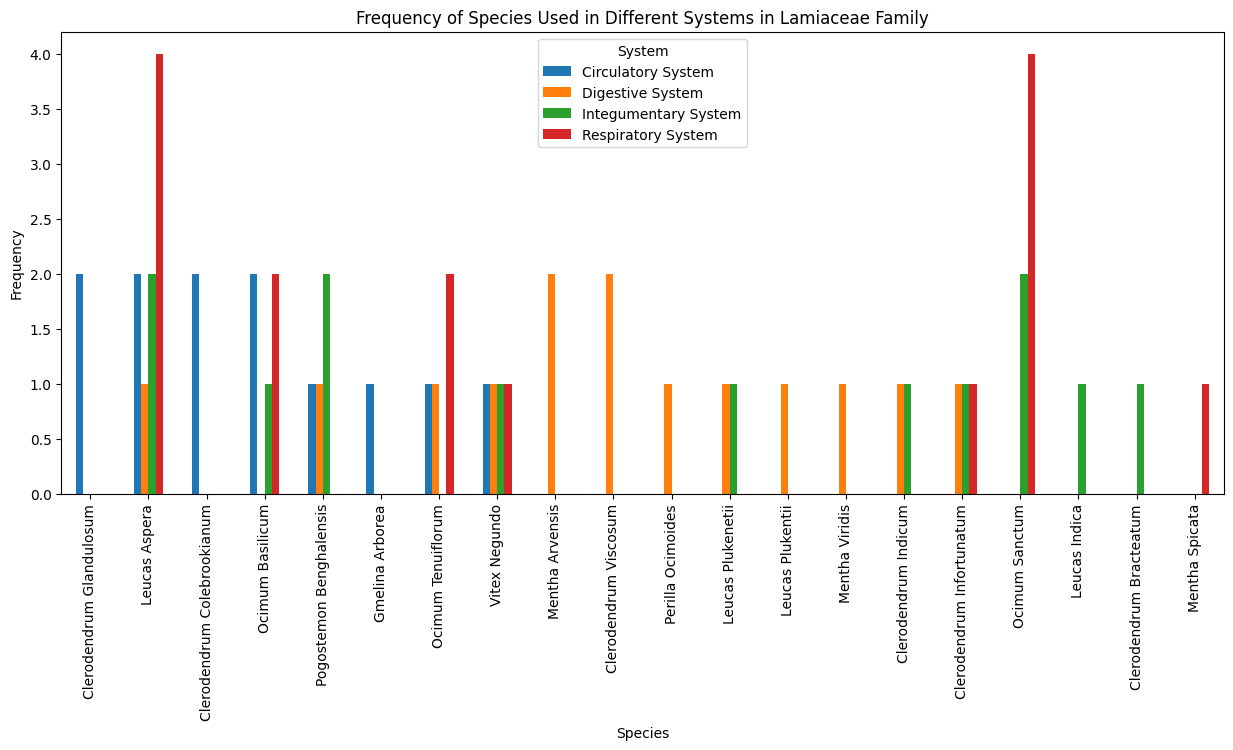

In [ ]:
# Preparing the data
systems_data2 = [circulatory_system_lemiaceae, digestive_system_lemiaceae, integumentary_system_lemiaceae, Respiratory_system_lemiaceae]
systems_names2 = ['Circulatory System', 'Digestive System', 'Integumentary System', 'Respiratory System']
#fef
def unified_plot_species2(systems_data, systems_names):
    # Creating a DataFrame for plotting
    species_data = pd.DataFrame()
    for system, data in zip(systems_names, systems_data):
        species_count = data['Botanical Name'].value_counts().rename(system)
        species_data = pd.concat([species_data, species_count], axis=1, sort=False)

    # Plotting
    species_data.fillna(0, inplace=True)
    species_data.plot(kind='bar', figsize=(15, 6))
    plt.title('Frequency of Species Used in Different Systems in Lamiaceae Family')
    plt.xlabel('Species')
    plt.ylabel('Frequency')
    plt.legend(title='System')
    plt.show()


# Creating unified plots

unified_plot_species2(systems_data2, systems_names2)

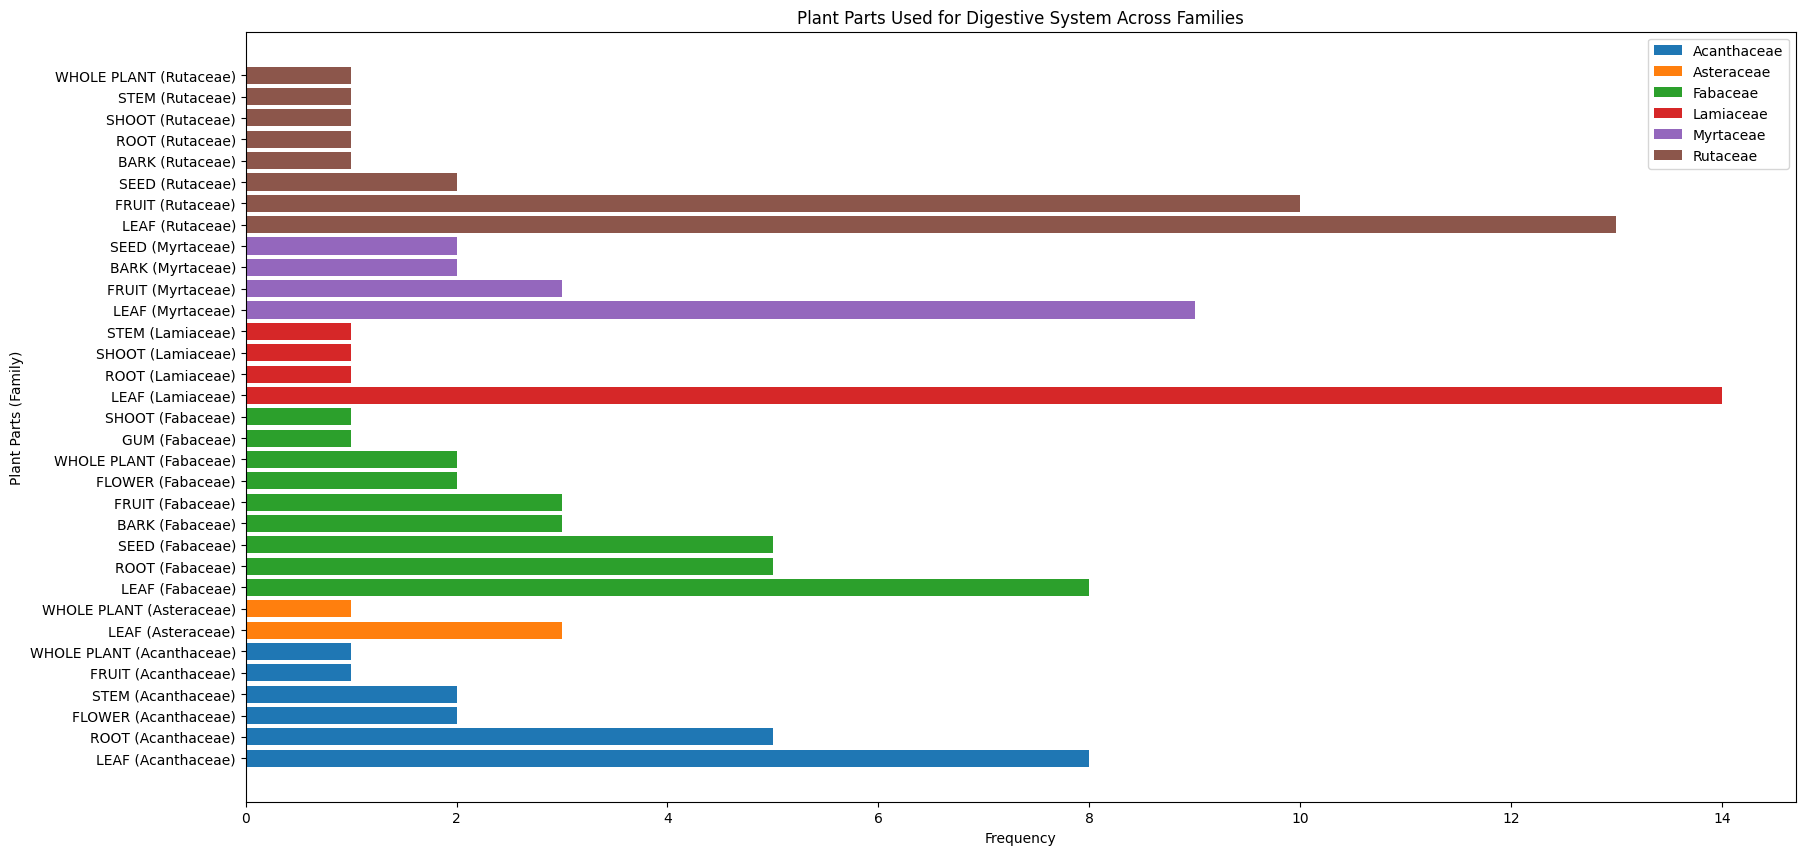

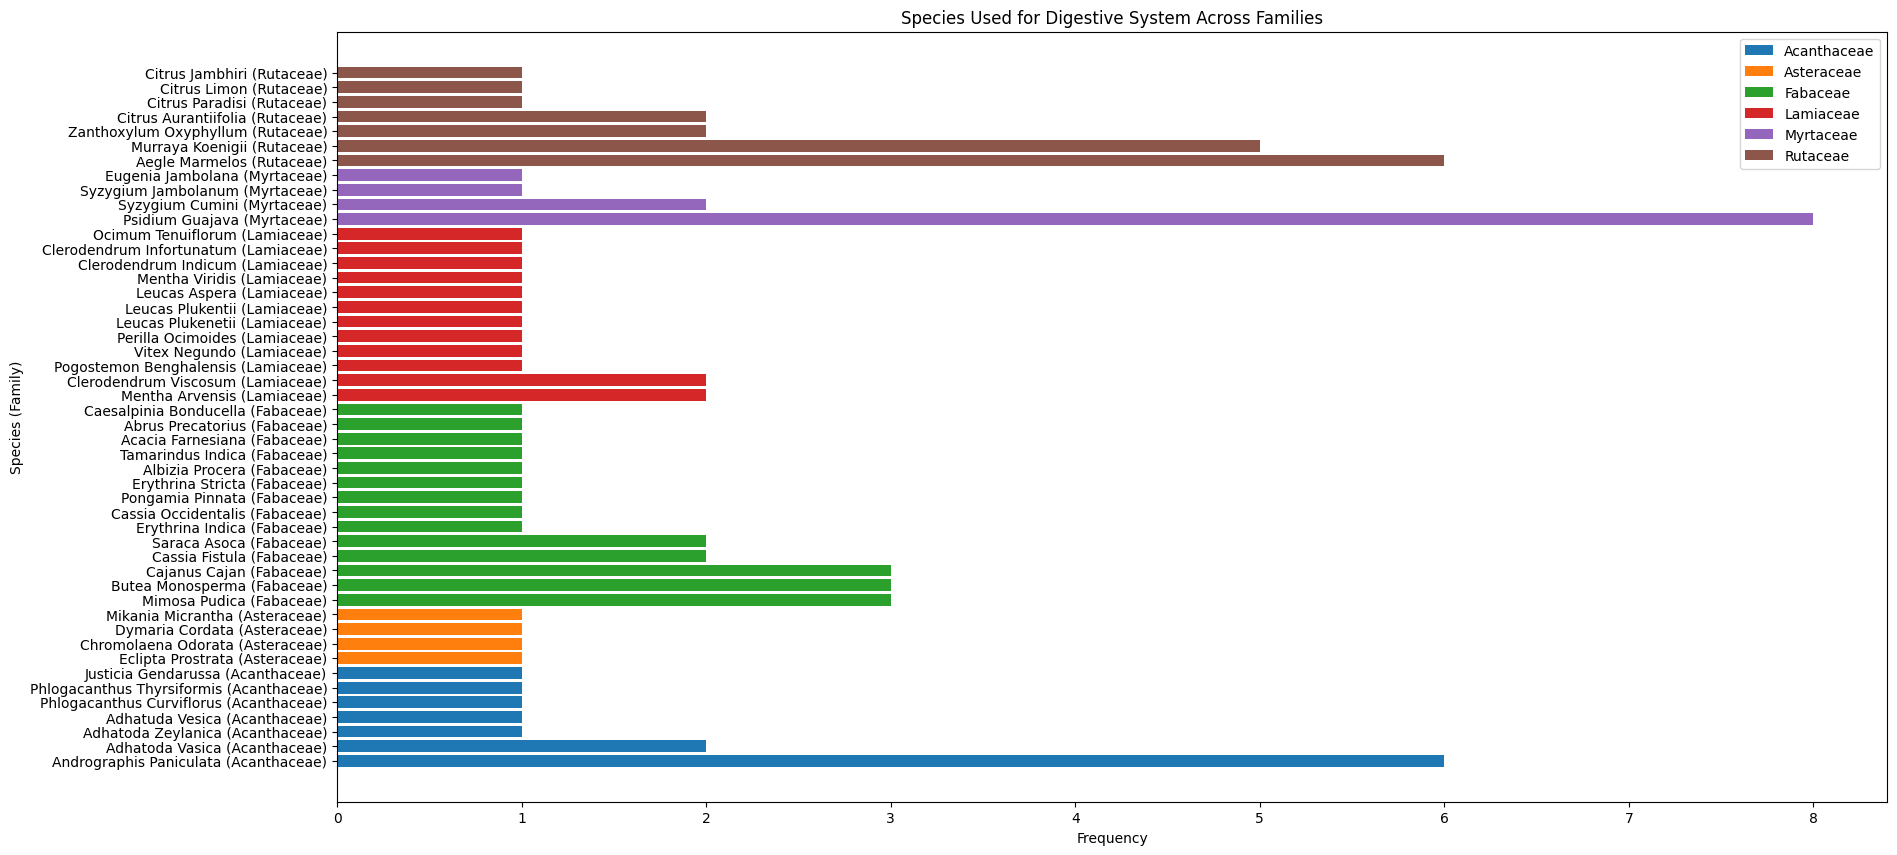

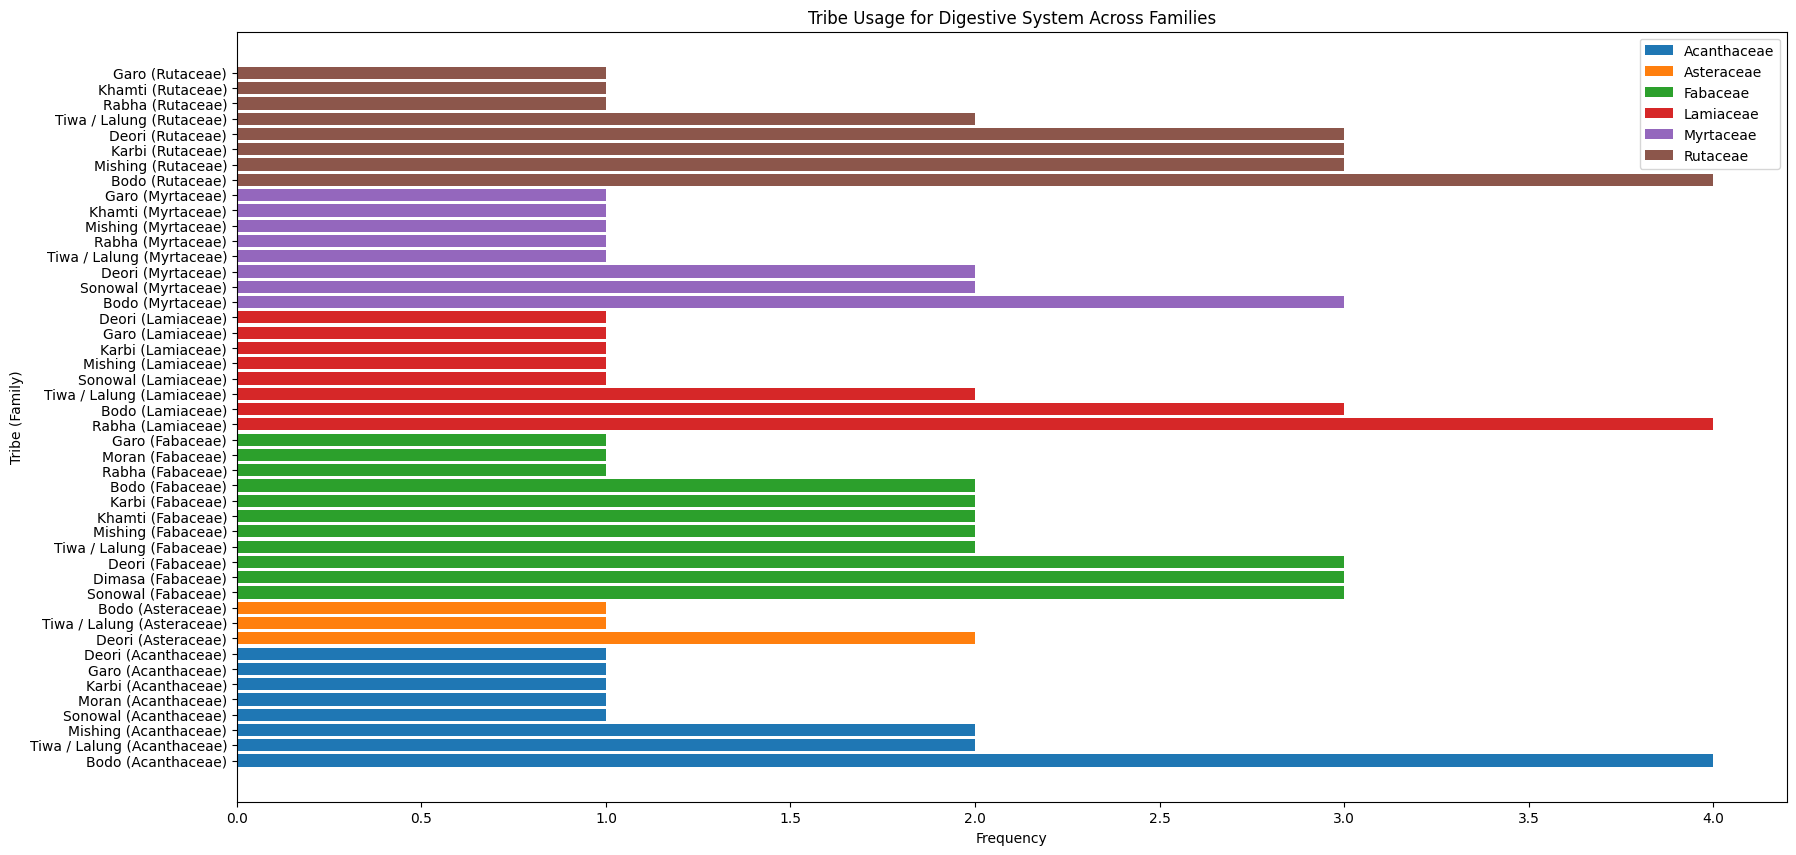

In [ ]:
# Re-importing pandas as the code execution state was reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Re-load the dataset to explore its content
file_path = '/content/V5 Juice=Fruit.xlsx'
data = pd.read_excel(file_path)

# Filtering the dataset for plants correlated with the digestive system across the specified families
families_for_digestive_system = ['Acanthaceae', 'Asteraceae', 'Fabaceae', 'Lamiaceae', 'Myrtaceae', 'Rutaceae']
digestive_system_data = data[data['Family Name'].isin(families_for_digestive_system) & data['System Acted Upon'].str.contains('Digestive', case=False, na=False)]

# Analyzing and plotting the data

# Function to plot the frequency of plant parts used for the digestive system in each family
def plot_parts_used_digestive(data, families):
    plt.figure(figsize=(15, 6))
    for family in families:
        family_data = data[data['Family Name'] == family]
        parts_count = family_data['Parts used'].str.get_dummies(sep=', ').sum()
        parts_count.sort_values(ascending=False, inplace=True)
        plt.bar(parts_count.index + " (" + family + ")", parts_count.values, label=family)
    plt.title('Plant Parts Used for Digestive System Across Families')
    plt.xlabel('Plant Parts (Family)')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Function to plot the frequency of species used for the digestive system in each family
def plot_species_digestive(data, families):
    plt.figure(figsize=(15, 6))
    for family in families:
        family_data = data[data['Family Name'] == family]
        species_count = family_data['Botanical Name'].value_counts()
        plt.bar(species_count.index + " (" + family + ")", species_count.values, label=family)
    plt.title('Species Used for Digestive System Across Families')
    plt.xlabel('Species (Family)')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

# Function to plot the frequency of tribes using plants for the digestive system in each family
def plot_tribes_digestive(data, families):
    plt.figure(figsize=(15, 6))
    for family in families:
        family_data = data[data['Family Name'] == family]
        tribe_count = family_data['Tribe'].value_counts()
        plt.bar(tribe_count.index + " (" + family + ")", tribe_count.values, label=family)
    plt.title('Tribe Usage for Digestive System Across Families')
    plt.xlabel('Tribe (Family)')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Creating the plots
plot_parts_used_digestive(digestive_system_data, families_for_digestive_system)
plot_species_digestive(digestive_system_data, families_for_digestive_system)
plot_tribes_digestive(digestive_system_data, families_for_digestive_system)


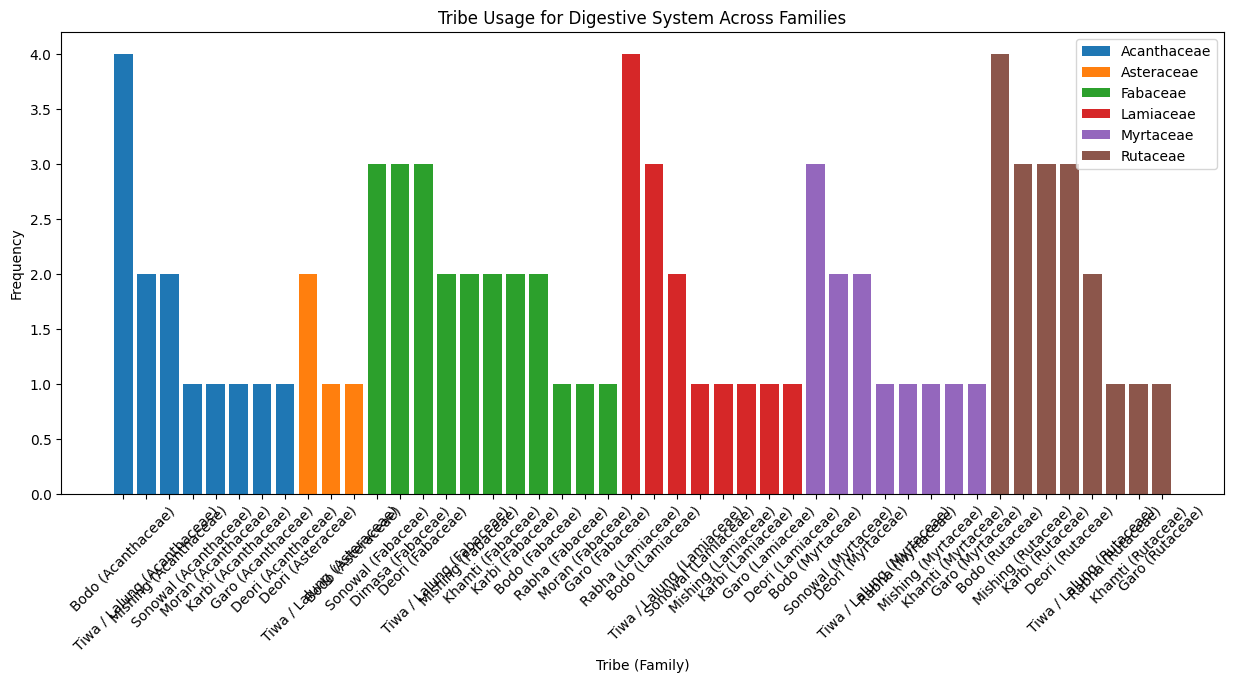

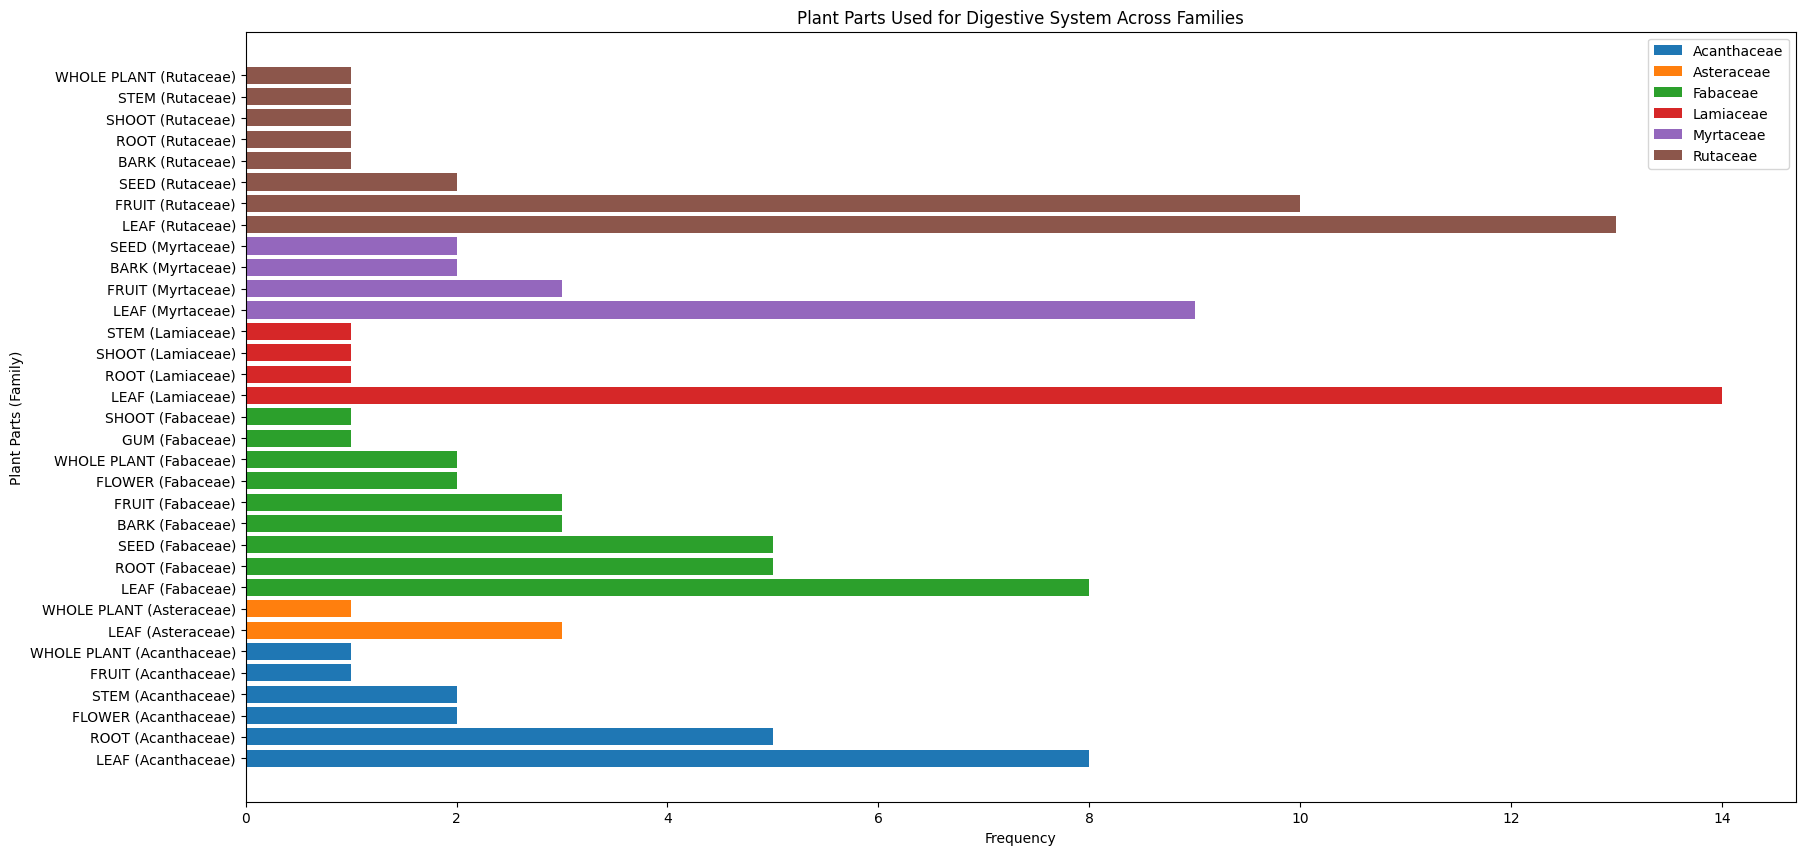

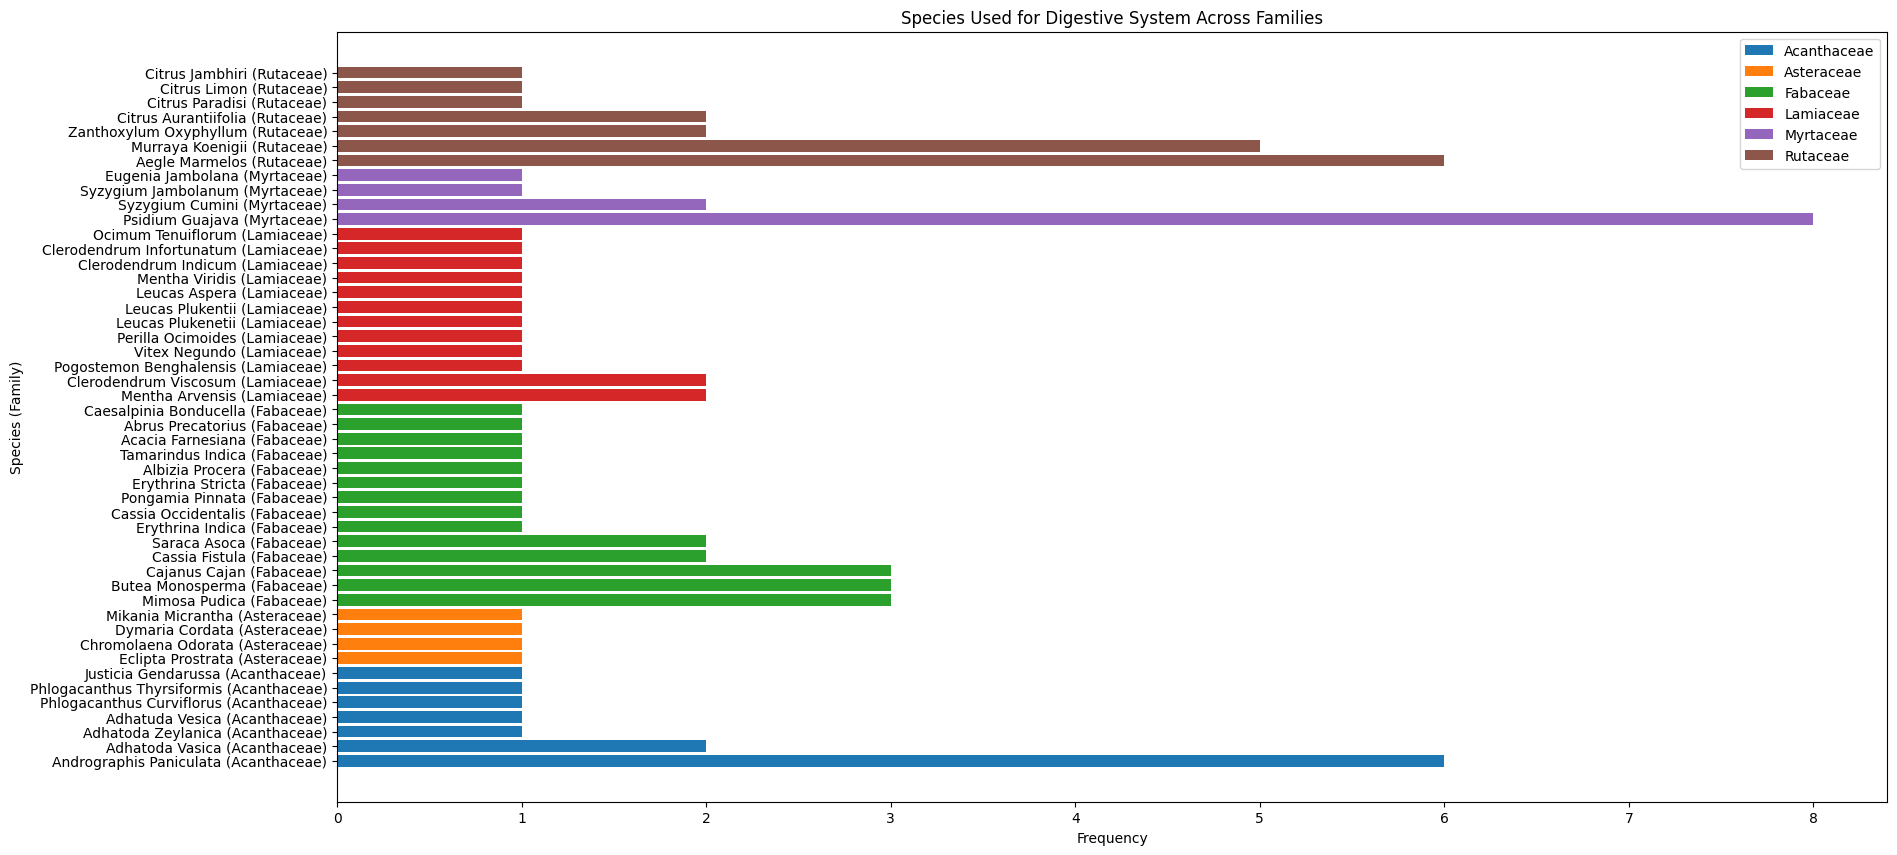

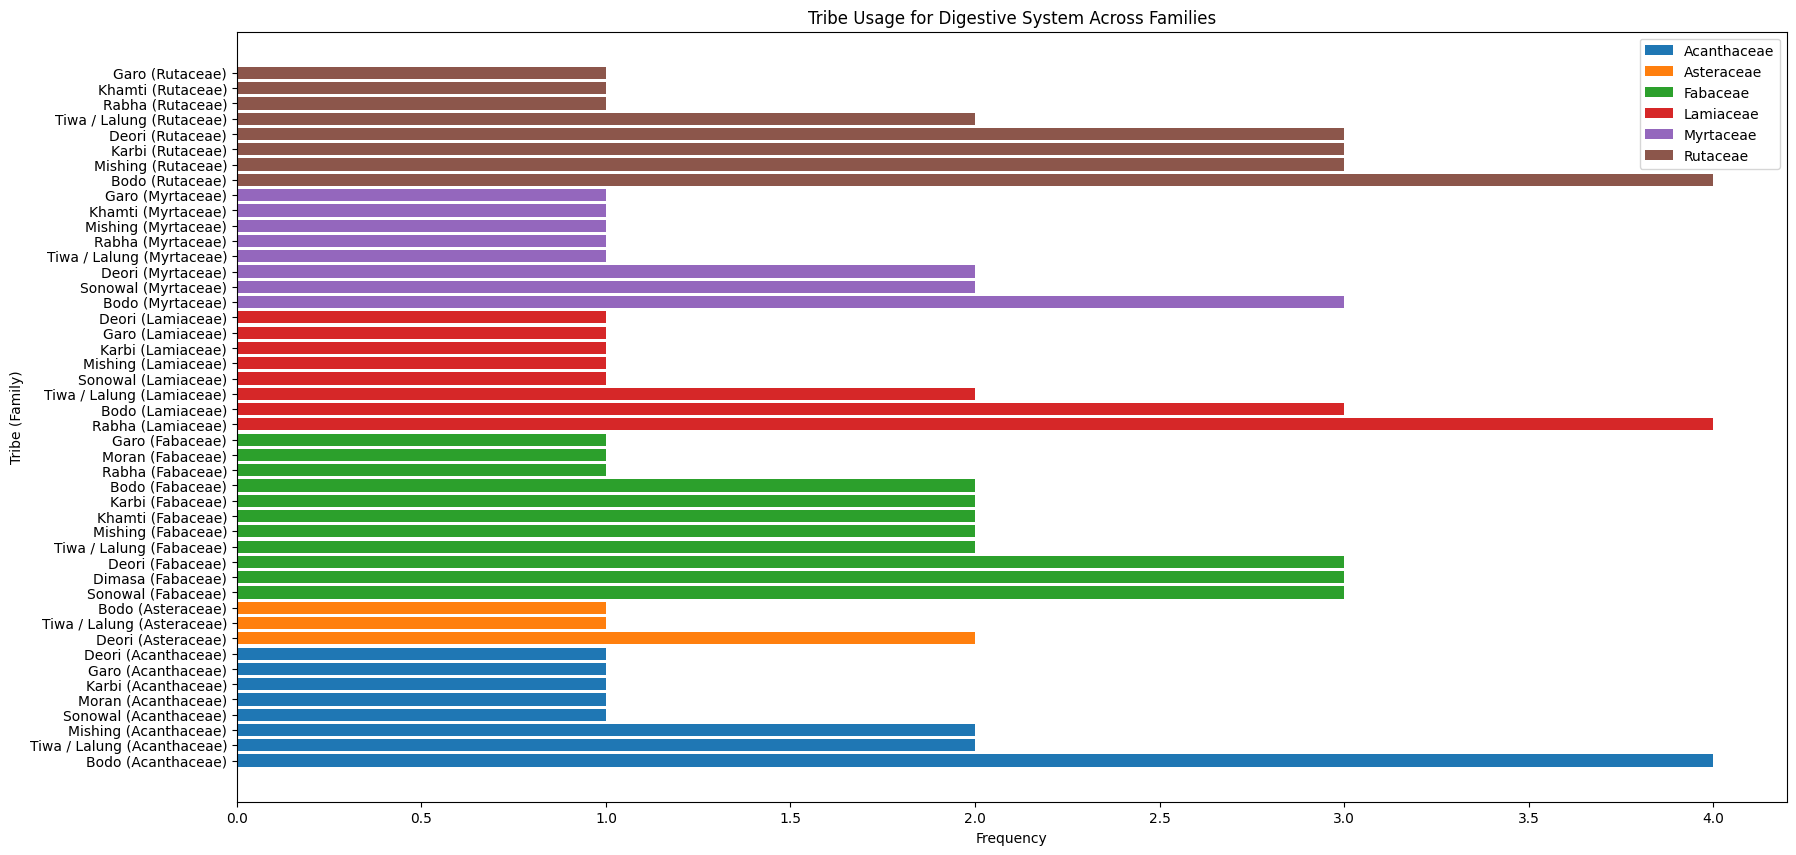

In [ ]:
# Adjusting the plots to improve readability

# Adjusted function to plot the frequency of plant parts used for the digestive system in each family with improvements
def adjusted_plot_parts_used_digestive(data, families):
    plt.figure(figsize=(20, 10))
    for family in families:
        family_data = data[data['Family Name'] == family]
        parts_count = family_data['Parts used'].str.get_dummies(sep=', ').sum()
        parts_count.sort_values(ascending=False, inplace=True)
        plt.barh(parts_count.index + " (" + family + ")", parts_count.values, label=family)
    plt.title('Plant Parts Used for Digestive System Across Families')
    plt.ylabel('Plant Parts (Family)')
    plt.xlabel('Frequency')
    plt.legend()
    plt.show()

# Adjusted function to plot the frequency of species used for the digestive system in each family with improvements
def adjusted_plot_species_digestive(data, families):
    plt.figure(figsize=(20, 10))
    for family in families:
        family_data = data[data['Family Name'] == family]
        species_count = family_data['Botanical Name'].value_counts()
        plt.barh(species_count.index + " (" + family + ")", species_count.values, label=family)
    plt.title('Species Used for Digestive System Across Families')
    plt.ylabel('Species (Family)')
    plt.xlabel('Frequency')
    plt.legend()
    plt.show()

# Adjusted function to plot the frequency of tribes using plants for the digestive system in each family with improvements
def adjusted_plot_tribes_digestive(data, families):
    plt.figure(figsize=(20, 10))
    for family in families:
        family_data = data[data['Family Name'] == family]
        tribe_count = family_data['Tribe'].value_counts()
        plt.barh(tribe_count.index + " (" + family + ")", tribe_count.values, label=family)
    plt.title('Tribe Usage for Digestive System Across Families')
    plt.ylabel('Tribe (Family)')
    plt.xlabel('Frequency')
    plt.legend()
    plt.show()

# Creating the adjusted plots
adjusted_plot_parts_used_digestive(digestive_system_data, families_for_digestive_system)
adjusted_plot_species_digestive(digestive_system_data, families_for_digestive_system)
adjusted_plot_tribes_digestive(digestive_system_data, families_for_digestive_system)


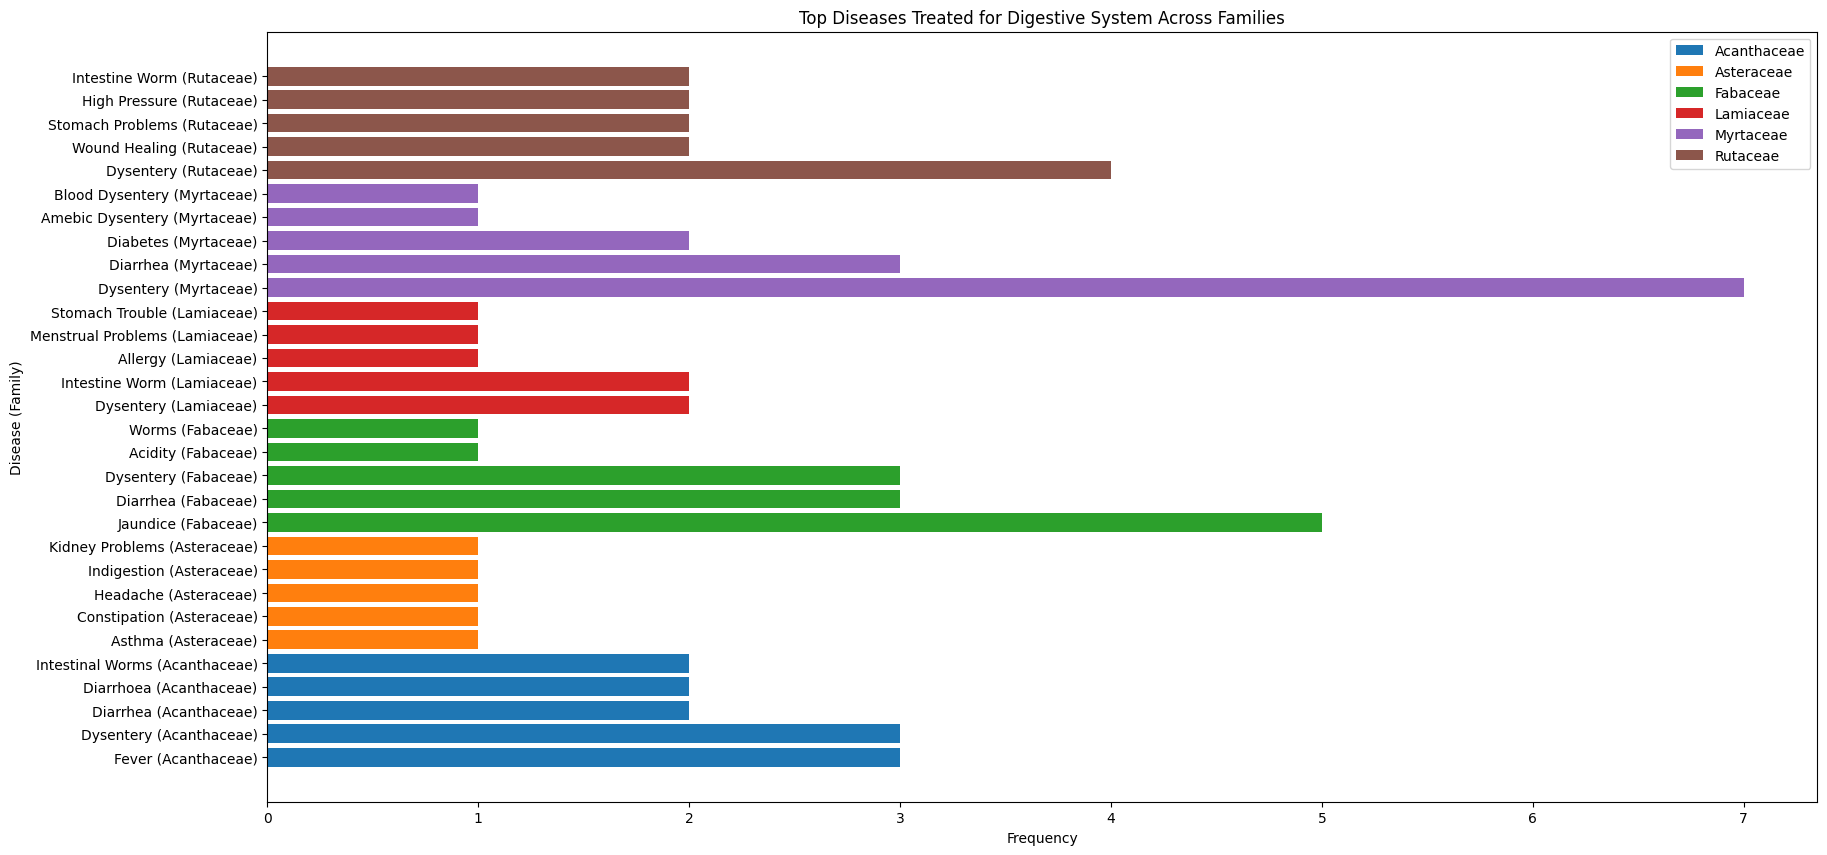

In [ ]:
# Simplified analysis and plotting for diseases treated for the digestive system in each family

# Simplified function to plot the frequency of diseases treated in each family for the digestive system
def simplified_plot_diseases_digestive(data, families):
    plt.figure(figsize=(20, 10))
    for family in families:
        family_data = data[data['Family Name'] == family]
        disease_count = family_data['Disease'].str.get_dummies(sep=', ').sum()
        disease_count.sort_values(ascending=False, inplace=True)
        # Selecting top 5 diseases for readability
        top_diseases = disease_count.head(5)
        plt.barh(top_diseases.index + " (" + family + ")", top_diseases.values, label=family)
    plt.title('Top Diseases Treated for Digestive System Across Families')
    plt.ylabel('Disease (Family)')
    plt.xlabel('Frequency')
    plt.legend()
    plt.show()

# Creating the simplified plot
simplified_plot_diseases_digestive(digestive_system_data, families_for_digestive_system)


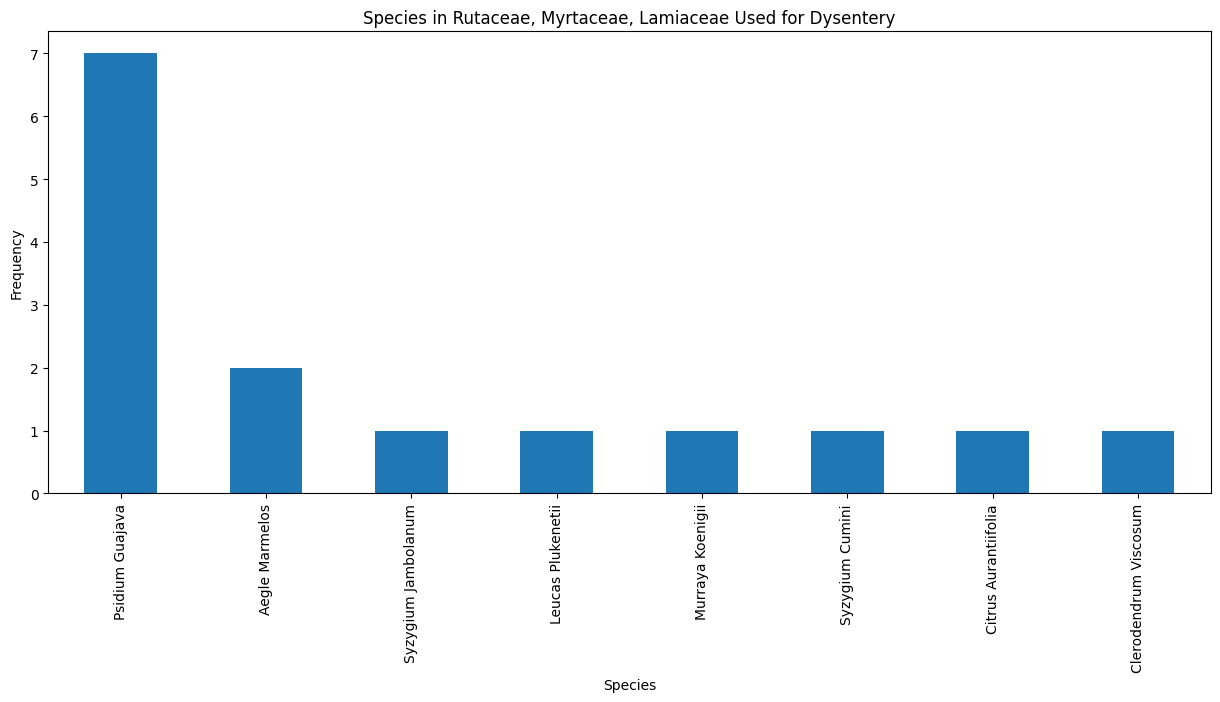

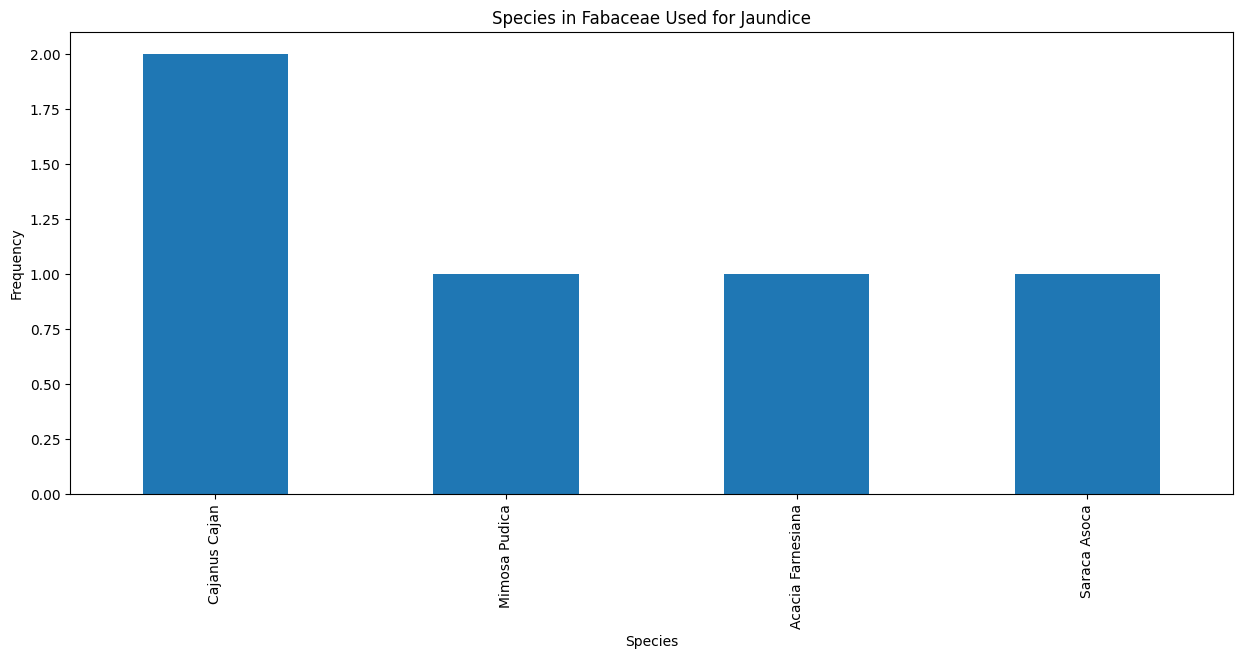

In [ ]:
# Filtering data for species in Rutaceae, Myrtaceae, Lamiaceae used for Dysentery
species_dysentery = digestive_system_data[(digestive_system_data['Disease'].str.contains('Dysentery', case=False, na=False)) &
                                          (digestive_system_data['Family Name'].isin(['Rutaceae', 'Myrtaceae', 'Lamiaceae']))]

# Filtering data for species in Fabaceae used for Jaundice
species_jaundice = digestive_system_data[(digestive_system_data['Disease'].str.contains('Jaundice', case=False, na=False)) &
                                         (digestive_system_data['Family Name'] == 'Fabaceae')]

# Counting the frequency of species used for Dysentery in Rutaceae, Myrtaceae, Lamiaceae
species_dysentery_count = species_dysentery['Botanical Name'].value_counts()

# Counting the frequency of species used for Jaundice in Fabaceae
species_jaundice_count = species_jaundice['Botanical Name'].value_counts()

# Plotting the results
plt.figure(figsize=(15, 6))
species_dysentery_count.plot(kind='bar')
plt.title('Species in Rutaceae, Myrtaceae, Lamiaceae Used for Dysentery')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(15, 6))
species_jaundice_count.plot(kind='bar')
plt.title('Species in Fabaceae Used for Jaundice')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.show()


<ipython-input-41-4670fe2e7cc3>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=system_counts_corrected.values, y=system_counts_corrected.index, palette="viridis")


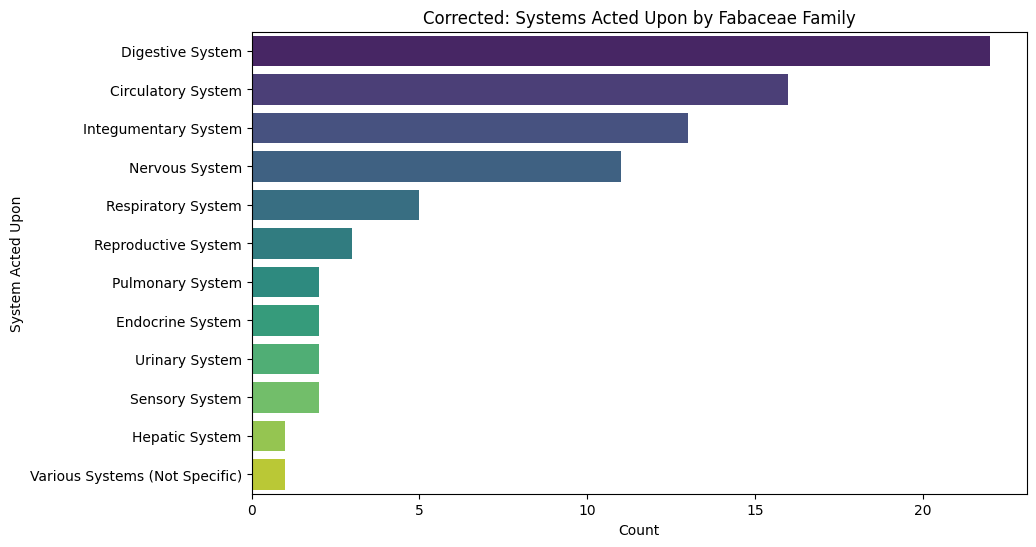

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_excel('/content/V5 Juice=Fruit.xlsx') # Replace 'your_file_path.xlsx' with your actual file path

# Filter data for Fabaceae family and split the systems
fabaceae_data = data[data['Family Name'] == 'Fabaceae']
system_list = fabaceae_data['System Acted Upon'].str.split(', ').explode()
system_counts_corrected = system_list.value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=system_counts_corrected.values, y=system_counts_corrected.index, palette="viridis")
plt.title('Corrected: Systems Acted Upon by Fabaceae Family')
plt.xlabel('Count')
plt.ylabel('System Acted Upon')
plt.show()


<ipython-input-42-edd586c0d189>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lamiaceae_system_counts.values, y=lamiaceae_system_counts.index, palette="viridis")


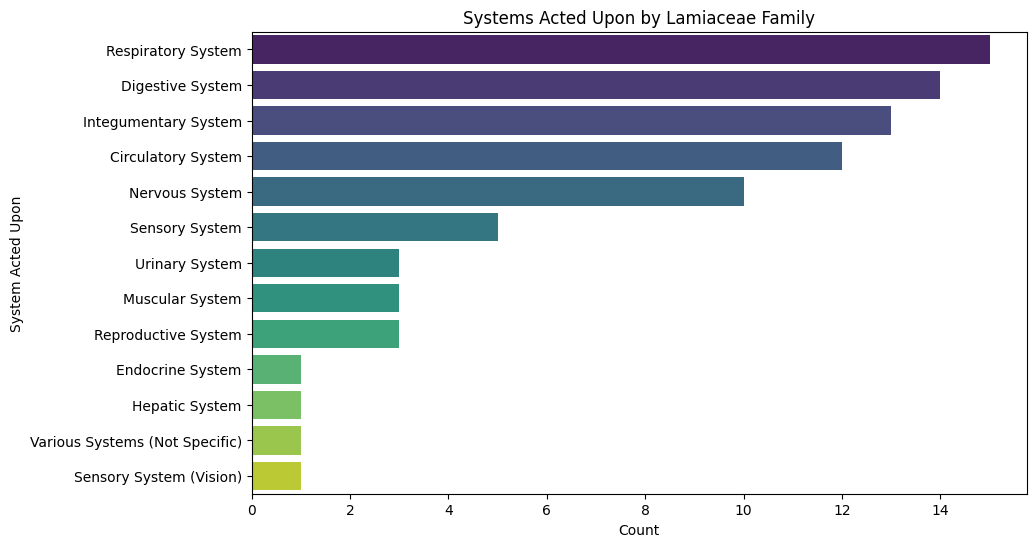

In [ ]:
# Filter data for Lamiaceae family and split the systems
lamiaceae_data = data[data['Family Name'] == 'Lamiaceae']
lamiaceae_system_list = lamiaceae_data['System Acted Upon'].str.split(', ').explode()
lamiaceae_system_counts = lamiaceae_system_list.value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=lamiaceae_system_counts.values, y=lamiaceae_system_counts.index, palette="viridis")
plt.title('Systems Acted Upon by Lamiaceae Family')
plt.xlabel('Count')
plt.ylabel('System Acted Upon')
plt.show()


<ipython-input-48-3342f3860555>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lamiaceae_botanical_systems['System Acted Upon'] = lamiaceae_botanical_systems['System Acted Upon'].str.split(', ')


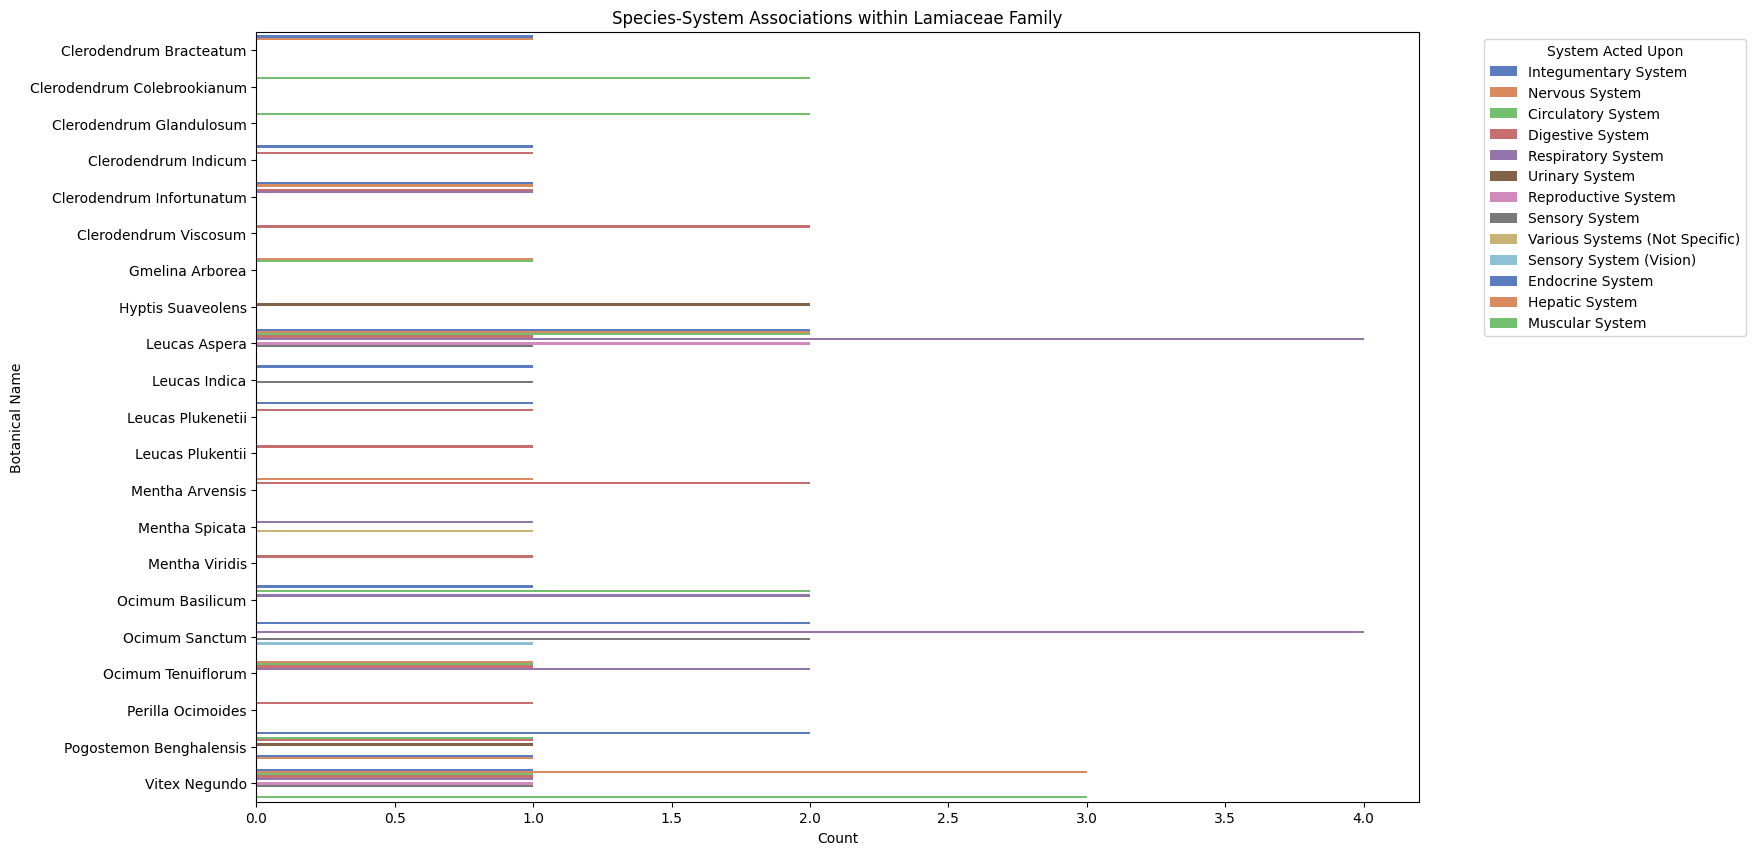

In [ ]:
# Create a DataFrame with each botanical name and the corresponding systems acted upon
lamiaceae_botanical_systems = lamiaceae_data[['Botanical Name', 'System Acted Upon']]
lamiaceae_botanical_systems['System Acted Upon'] = lamiaceae_botanical_systems['System Acted Upon'].str.split(', ')
exploded_lamiaceae_botanical_systems = lamiaceae_botanical_systems.explode('System Acted Upon')

# Group by botanical name and system acted upon, then count the occurrences
lamiaceae_species_system_association = exploded_lamiaceae_botanical_systems.groupby(['Botanical Name', 'System Acted Upon']).size().reset_index(name='Count')
sorted_lamiaceae_species_system_association = lamiaceae_species_system_association.sort_values(by=['Botanical Name', 'Count'], ascending=[True, False])

# Create a plot
plt.figure(figsize=(15, 10))
sns.barplot(x='Count', y='Botanical Name', hue='System Acted Upon', data=sorted_lamiaceae_species_system_association, palette="muted")
plt.title('Species-System Associations within Lamiaceae Family')
plt.xlabel('Count')
plt.ylabel('Botanical Name')
plt.legend(title='System Acted Upon', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


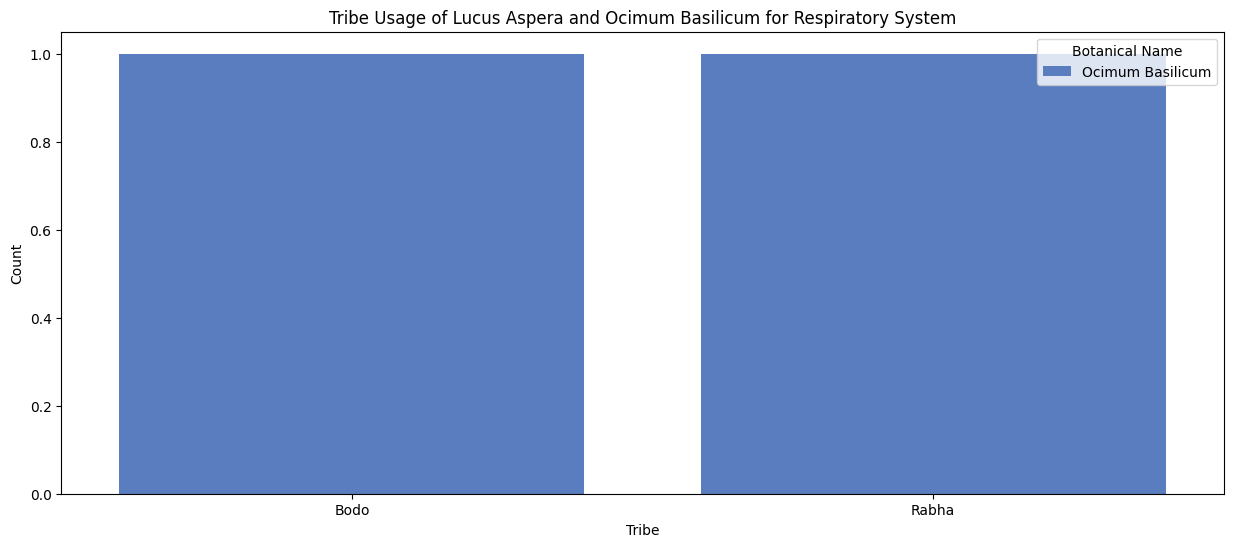

In [ ]:
# Filtering data for "Lucus Aspera" and "Ocimum Basilicum"
specific_plants = lamiaceae_data[lamiaceae_data['Botanical Name'].isin(['Lucus Aspera', 'Ocimum Basilicum'])]
respiratory_system_data = specific_plants[specific_plants['System Acted Upon'].str.contains('Respiratory System')]

# Grouping by botanical name and tribe, then counting the occurrences
tribe_usage = respiratory_system_data.groupby(['Botanical Name', 'Tribe']).size().reset_index(name='Count')

# Create a plot
plt.figure(figsize=(15, 6))
sns.barplot(x='Tribe', y='Count', hue='Botanical Name', data=tribe_usage, palette="muted")
plt.title('Tribe Usage of Lucus Aspera and Ocimum Basilicum for Respiratory System')
plt.xlabel('Tribe')
plt.ylabel('Count')
plt.legend(title='Botanical Name')
plt.show()


In [ ]:
specific_plants.head()

Botanical Name Family Name       Common Name           Parts used  \
155  Ocimum Basilicum   Lamiaceae        Ban Tulosi  LEAF, INFLORESCENCE   
623  Ocimum Basilicum   Lamiaceae     Ram Thulungsi                 LEAF   
695  Ocimum Basilicum   Lamiaceae  Hagrani  Thulusi                 LEAF   

                                Disease  \
155  Cough And Chronic Fungal Infection   
623                       High Pressure   
695                     Cough, Bleeding   

                            System Acted Upon       Way to use  Tribe  
155  Respiratory System, Integumentary System  Leaves Are Used  Rabha  
623                        Circulatory System            Juice   Bodo  
695    Respiratory System, Circulatory System            Paste   Bodo